In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Importing lead dataset
lead_data = pd.read_csv("Leads.csv")
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
# Data Inspection


In [5]:
# checking the shape of the data 
lead_data.shape

(9240, 37)

In [7]:
# checking non null count and datatype of the variables
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
## All the dataypes of the variables are in correct format.

In [9]:
# Describing data
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [10]:
# Data Cleaning

## 1)Handling the 'Select' level that is present in many of the categorical variables.

In [11]:
# Converting 'Select' values to NaN.
lead_data = lead_data.replace('Select', np.nan)

In [12]:
# checking the columns for null values
lead_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [13]:
# Finding the null percentages across columns
round(lead_data.isnull().sum()/len(lead_data.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

In [14]:
# dropping the columns with missing values greater than or equal to 40% .
lead_data=lead_data.drop(columns=['How did you hear about X Education','Lead Quality','Lead Profile',
                                  'Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score',
                                 'Asymmetrique Profile Score'])

In [15]:
# Finding the null percentages across columns after removing the above columns
round(lead_data.isnull().sum()/len(lead_data.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Business Administration'),
  Text(1, 0, 'Media and Advertising'),
  Text(2, 0, 'Supply Chain Management'),
  Text(3, 0, 'IT Projects Management'),
  Text(4, 0, 'Finance Management'),
  Text(5, 0, 'Travel and Tourism'),
  Text(6, 0, 'Human Resource Management'),
  Text(7, 0, 'Marketing Management'),
  Text(8, 0, 'Banking, Investment And Insurance'),
  Text(9, 0, 'International Business'),
  Text(10, 0, 'E-COMMERCE'),
  Text(11, 0, 'Operations Management'),
  Text(12, 0, 'Retail Management'),
  Text(13, 0, 'Services Excellence'),
  Text(14, 0, 'Hospitality Management'),
  Text(15, 0, 'Rural and Agribusiness'),
  Text(16, 0, 'Healthcare Management'),
  Text(17, 0, 'E-Business')])

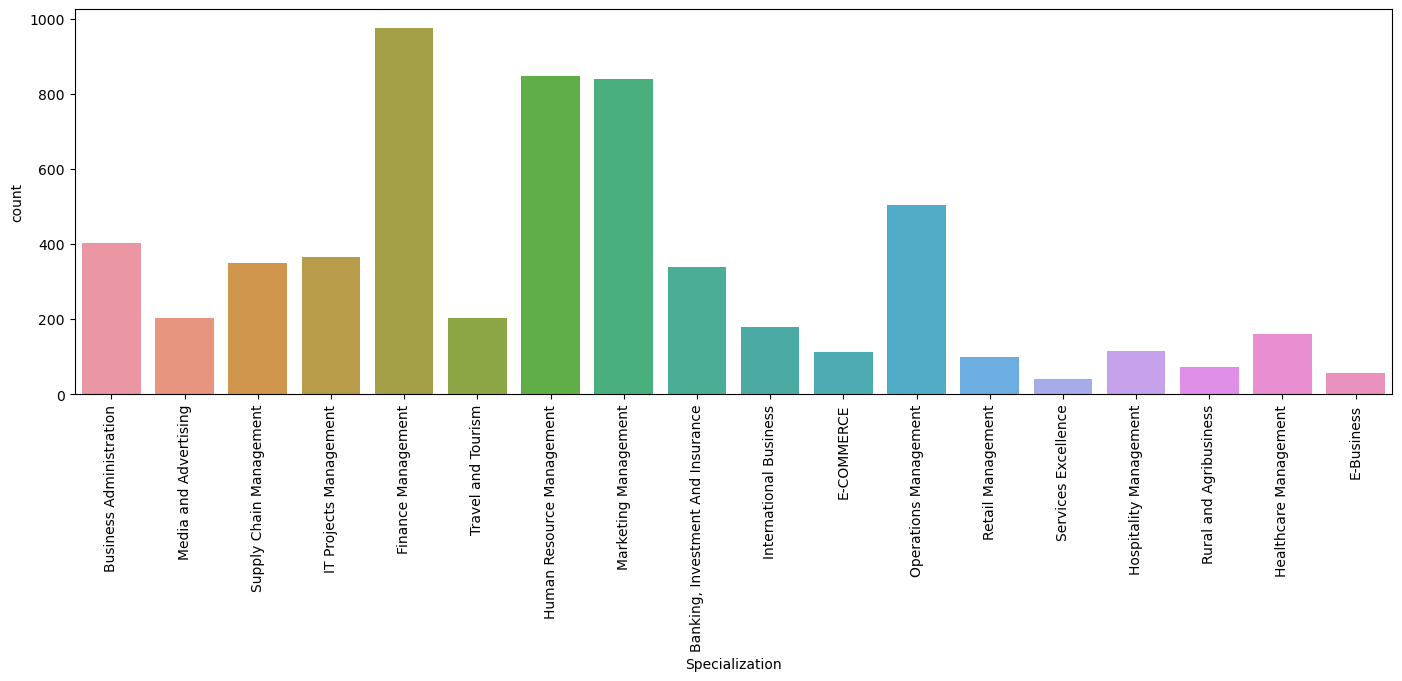

In [16]:
plt.figure(figsize=(17,5))
sns.countplot(lead_data['Specialization'])
plt.xticks(rotation=90)

In [18]:
# There is 37% missing values present in the Specialization column .It may be possible that the lead may leave this column blank if he may be a student or not having any specialization or his specialization is not there in the options given. So we can create a another category 'Others' for this.

In [19]:
# 2) Tags column

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Lost to EINS'),
  Text(4, 0, 'In confusion whether part time or DLP'),
  Text(5, 0, 'Busy'),
  Text(6, 0, 'switched off'),
  Text(7, 0, 'in touch with EINS'),
  Text(8, 0, 'Already a student'),
  Text(9, 0, 'Diploma holder (Not Eligible)'),
  Text(10, 0, 'Graduation in progress'),
  Text(11, 0, 'Closed by Horizzon'),
  Text(12, 0, 'number not provided'),
  Text(13, 0, 'opp hangup'),
  Text(14, 0, 'Not doing further education'),
  Text(15, 0, 'invalid number'),
  Text(16, 0, 'wrong number given'),
  Text(17, 0, 'Interested  in full time MBA'),
  Text(18, 0, 'Still Thinking'),
  Text(19, 0, 'Lost to Others'),
  Text(20, 0, 'Shall take in the next coming month'),
  Text(21, 0, 'Lateral student'),
  Text(22, 0, 'Interested in Next batc

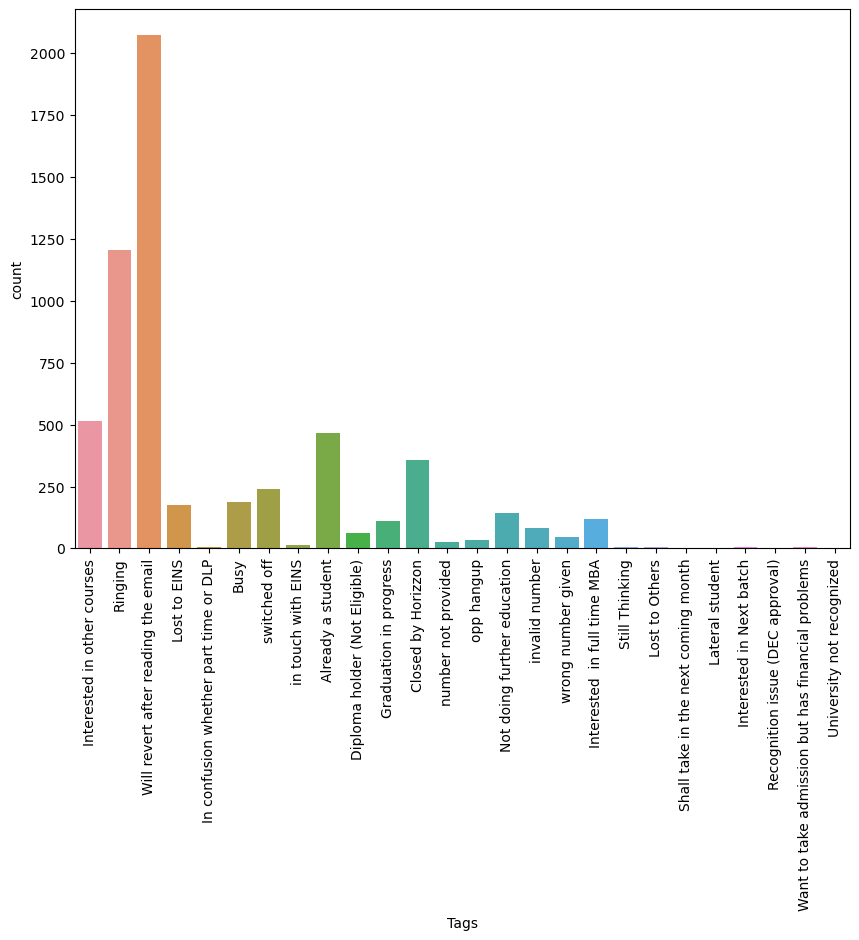

In [20]:
# Visualizing Tags column
plt.figure(figsize=(10,7))
sns.countplot(lead_data['Tags'])
plt.xticks(rotation=90)

In [21]:
# Imputing the missing data in the tags column with 'Will revert after reading the email'
lead_data['Tags']=lead_data['Tags'].replace(np.nan,'Will revert after reading the email')

In [22]:
# 3) Column: 'What matters most to you in choosing a course'

(array([0, 1, 2]),
 [Text(0, 0, 'Better Career Prospects'),
  Text(1, 0, 'Flexibility & Convenience'),
  Text(2, 0, 'Other')])

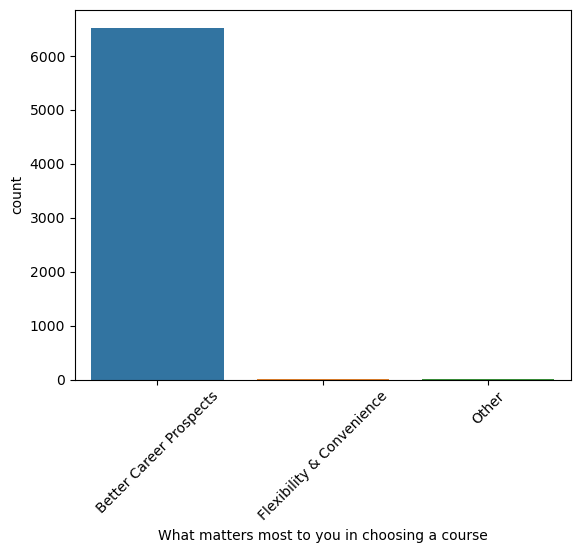

In [23]:
# Visualizing this column
sns.countplot(lead_data['What matters most to you in choosing a course'])
plt.xticks(rotation=45)

In [24]:
# Finding the percentage of the different categories of this column:
round(lead_data['What matters most to you in choosing a course'].value_counts(normalize=True),2)*100

Better Career Prospects      100.0
Flexibility & Convenience      0.0
Other                          0.0
Name: What matters most to you in choosing a course, dtype: float64

In [25]:
# Dropping this column 
lead_data=lead_data.drop('What matters most to you in choosing a course',axis=1)

In [26]:
# 4) Column: 'What is your current occupation'

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Student'),
  Text(2, 0, 'Working Professional'),
  Text(3, 0, 'Businessman'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Housewife')])

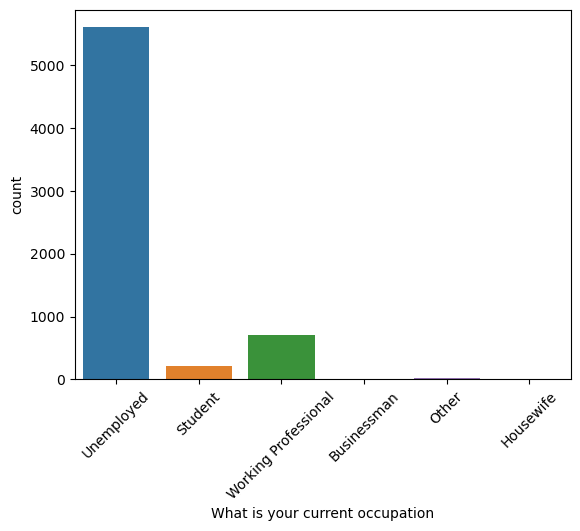

In [27]:
sns.countplot(lead_data['What is your current occupation'])
plt.xticks(rotation=45)

In [28]:
# Finding the percentage of the different categories of this column:
round(lead_data['What is your current occupation'].value_counts(normalize=True),2)*100

Unemployed              85.0
Working Professional    11.0
Student                  3.0
Other                    0.0
Housewife                0.0
Businessman              0.0
Name: What is your current occupation, dtype: float64

In [29]:
# Imputing the missing data in the 'What is your current occupation' column with 'Unemployed'
lead_data['What is your current occupation']=lead_data['What is your current occupation'].replace(np.nan,'Unemployed')

In [30]:
# 5) Column: 'Country'


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 [Text(0, 0, 'India'),
  Text(1, 0, 'Russia'),
  Text(2, 0, 'Kuwait'),
  Text(3, 0, 'Oman'),
  Text(4, 0, 'United Arab Emirates'),
  Text(5, 0, 'United States'),
  Text(6, 0, 'Australia'),
  Text(7, 0, 'United Kingdom'),
  Text(8, 0, 'Bahrain'),
  Text(9, 0, 'Ghana'),
  Text(10, 0, 'Singapore'),
  Text(11, 0, 'Qatar'),
  Text(12, 0, 'Saudi Arabia'),
  Text(13, 0, 'Belgium'),
  Text(14, 0, 'France'),
  Text(15, 0, 'Sri Lanka'),
  Text(16, 0, 'China'),
  Text(17, 0, 'Canada'),
  Text(18, 0, 'Netherlands'),
  Text(19, 0, 'Sweden'),
  Text(20, 0, 'Nigeria'),
  Text(21, 0, 'Hong Kong'),
  Text(22, 0, 'Germany'),
  Text(23, 0, 'Asia/Pacific Region'),
  Text(24, 0, 'Uganda'),
  Text(25, 0, 'Kenya'),
  Text(26, 0, 'Italy'),
  Text(27, 0, 'South Africa'),
  Text(28, 0, 'Tanzania'),
  Text(29, 0, 'unknown'),
  Text(30, 0

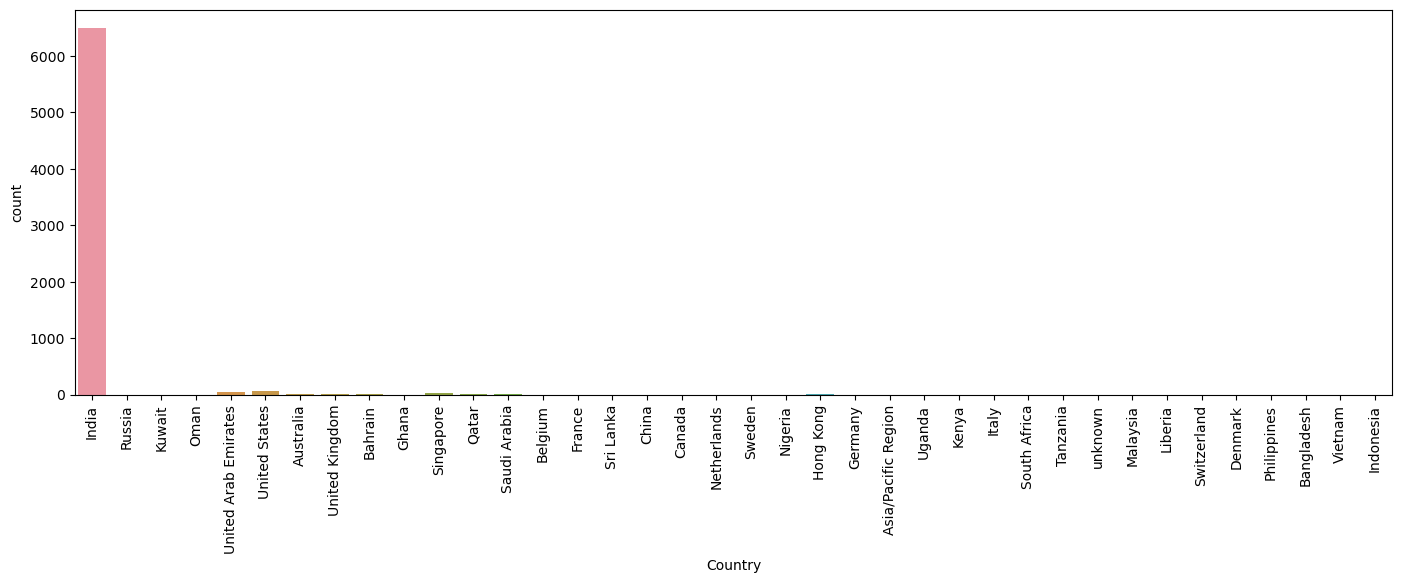

In [31]:
plt.figure(figsize=(17,5))
sns.countplot(lead_data['Country'])
plt.xticks(rotation=90)

In [32]:
# Imputing the missing data in the 'Country' column with 'India'
lead_data['Country']=lead_data['Country'].replace(np.nan,'India')

In [33]:
# 6) Column: 'City'

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Thane & Outskirts'),
  Text(2, 0, 'Other Metro Cities'),
  Text(3, 0, 'Other Cities'),
  Text(4, 0, 'Other Cities of Maharashtra'),
  Text(5, 0, 'Tier II Cities')])

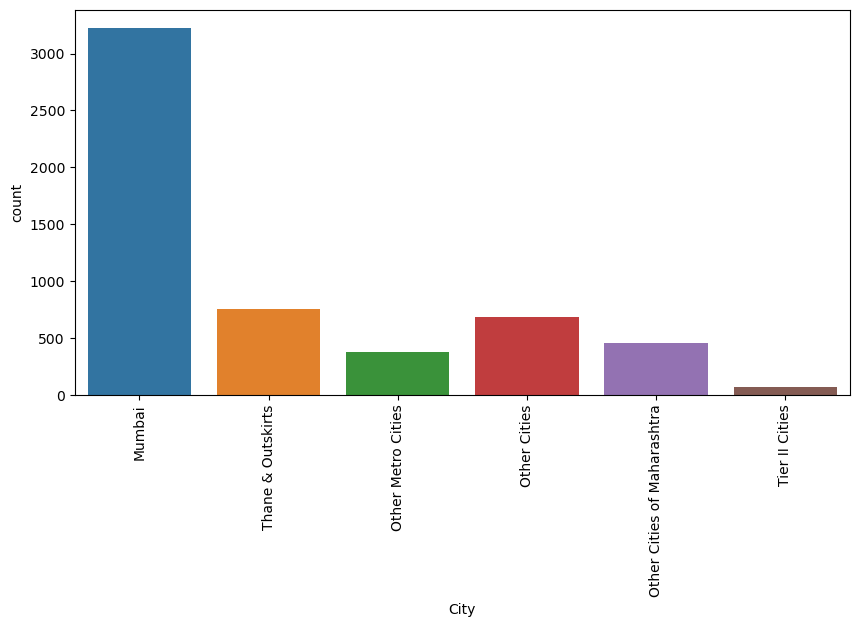

In [34]:
plt.figure(figsize=(10,5))
sns.countplot(lead_data['City'])
plt.xticks(rotation=90)

In [35]:
# Finding the percentage of the different categories of this column:
round(lead_data['City'].value_counts(normalize=True),2)*100

Mumbai                         58.0
Thane & Outskirts              13.0
Other Cities                   12.0
Other Cities of Maharashtra     8.0
Other Metro Cities              7.0
Tier II Cities                  1.0
Name: City, dtype: float64

In [36]:
# Imputing the missing data in the 'City' column with 'Mumbai'
lead_data['City']=lead_data['City'].replace(np.nan,'Mumbai')

In [37]:
# Finding the null percentages across columns after removing the above columns
round(lead_data.isnull().sum()/len(lead_data.index),2)*100

Prospect ID                                  0.0
Lead Number                                  0.0
Lead Origin                                  0.0
Lead Source                                  0.0
Do Not Email                                 0.0
Do Not Call                                  0.0
Converted                                    0.0
TotalVisits                                  1.0
Total Time Spent on Website                  0.0
Page Views Per Visit                         1.0
Last Activity                                1.0
Country                                      0.0
Specialization                              37.0
What is your current occupation              0.0
Search                                       0.0
Magazine                                     0.0
Newspaper Article                            0.0
X Education Forums                           0.0
Newspaper                                    0.0
Digital Advertisement                        0.0
Through Recommendati

In [38]:
# Dropping the rows with null values
lead_data.dropna(inplace = True)

In [39]:
# Finding the null percentages across columns after removing the above columns
round(lead_data.isnull().sum()/len(lead_data.index),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

In [40]:
# Percentage of rows retained 
(len(lead_data.index)/9240)*100

62.683982683982684

In [42]:
# Exploratory Data Anaysis

##Checking for duplicates:

In [43]:
lead_data[lead_data.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


In [45]:
# Univariate Analysis and Bivariate Analysis

##1) Converted

In [46]:
Converted = (sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100
Converted

43.75

In [47]:
##2) Lead Origin

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Landing Page Submission'),
  Text(1, 0, 'API'),
  Text(2, 0, 'Lead Add Form'),
  Text(3, 0, 'Lead Import')])

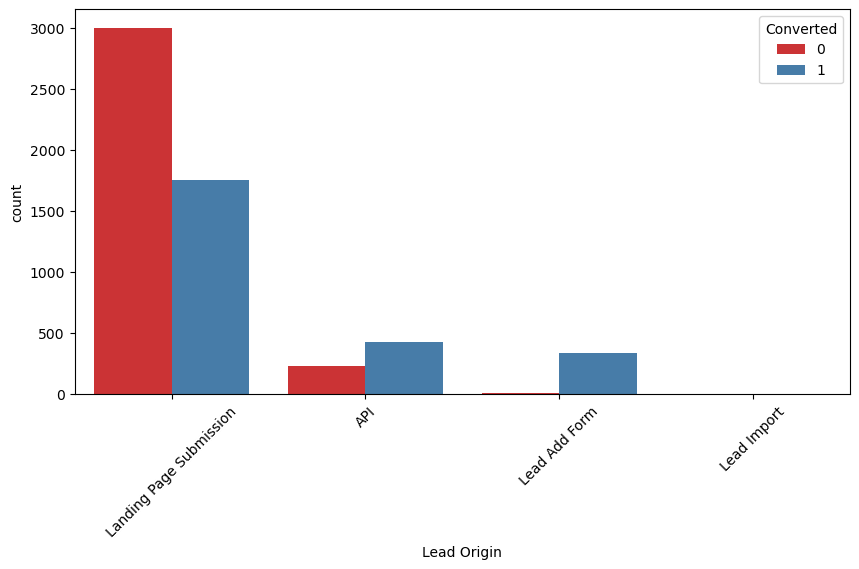

In [48]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Origin", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 45)

In [49]:
##3) Lead Source

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Direct Traffic'),
  Text(1, 0, 'Google'),
  Text(2, 0, 'Organic Search'),
  Text(3, 0, 'Referral Sites'),
  Text(4, 0, 'Olark Chat'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'Welingak Website'),
  Text(7, 0, 'Facebook'),
  Text(8, 0, 'blog'),
  Text(9, 0, 'Pay per Click Ads'),
  Text(10, 0, 'bing'),
  Text(11, 0, 'Social Media'),
  Text(12, 0, 'WeLearn'),
  Text(13, 0, 'Click2call'),
  Text(14, 0, 'welearnblog_Home'),
  Text(15, 0, 'youtubechannel'),
  Text(16, 0, 'testone'),
  Text(17, 0, 'Press_Release'),
  Text(18, 0, 'NC_EDM')])

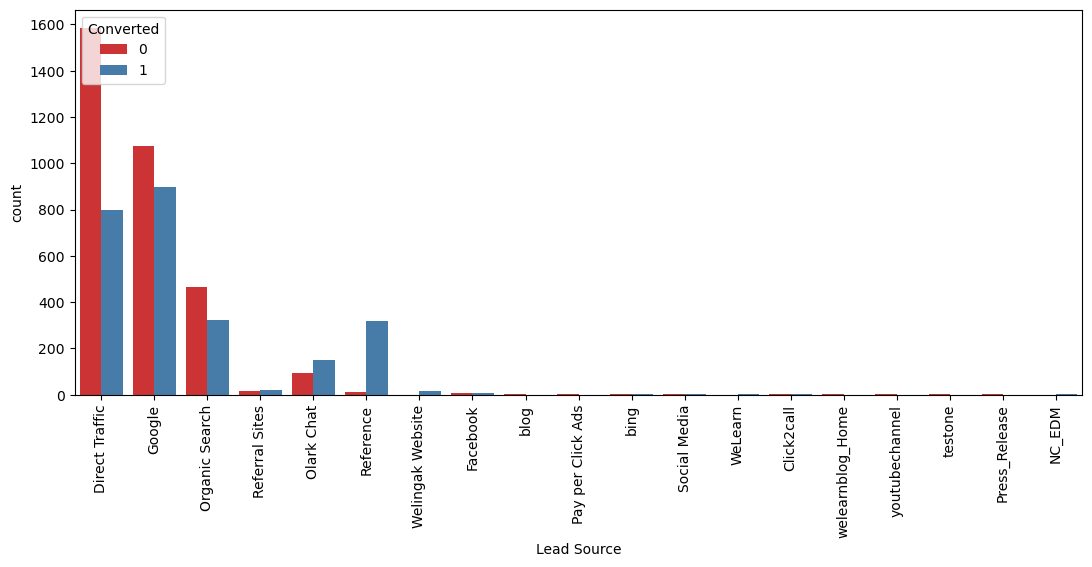

In [50]:
plt.figure(figsize=(13,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = lead_data, palette='Set1')
plt.xticks(rotation = 90)

In [51]:
# Need to replace 'google' with 'Google'
lead_data['Lead Source'] = lead_data['Lead Source'].replace(['google'], 'Google')

In [52]:
# Creating a new category 'Others' for some of the Lead Sources which do not have much values.
lead_data['Lead Source'] = lead_data['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Direct Traffic'),
  Text(1, 0, 'Google'),
  Text(2, 0, 'Organic Search'),
  Text(3, 0, 'Referral Sites'),
  Text(4, 0, 'Olark Chat'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'Welingak Website'),
  Text(7, 0, 'Facebook'),
  Text(8, 0, 'Others')])

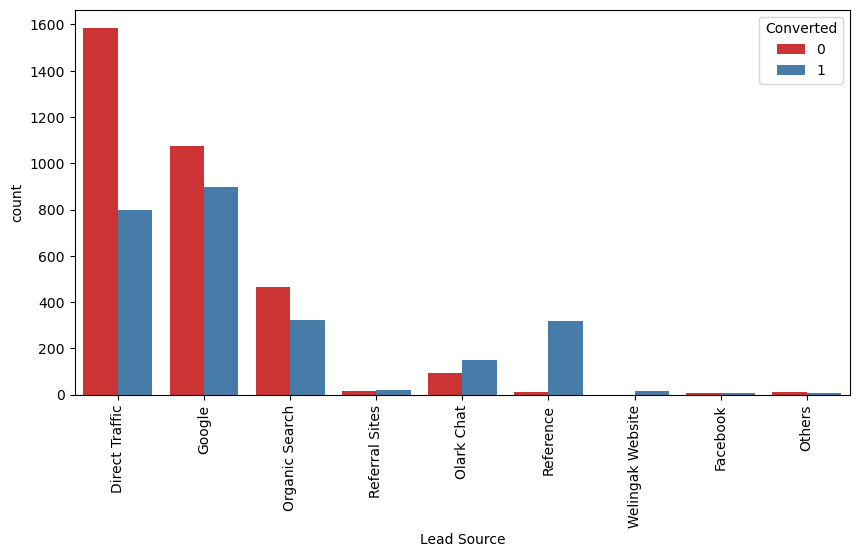

In [53]:
# Visualizing again
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

In [54]:
## 4) Do not Email

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

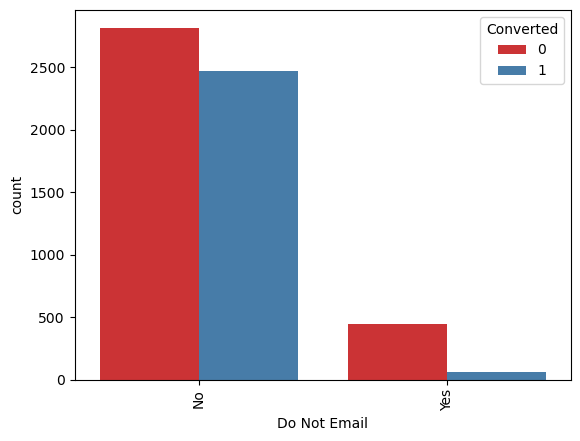

In [55]:
sns.countplot(x = "Do Not Email", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

In [56]:
## 5) Do not call

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

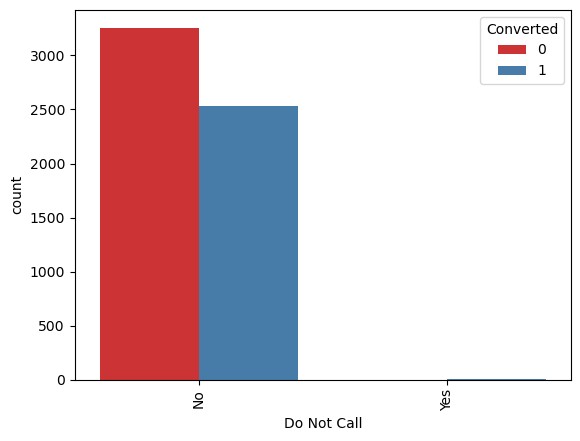

In [57]:
sns.countplot(x = "Do Not Call", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

In [58]:
##6) TotalVisits

In [59]:
lead_data['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])


count    5792.000000
mean        4.383115
std         5.362541
min         0.000000
5%          0.000000
25%         2.000000
50%         4.000000
75%         5.000000
90%         8.000000
95%        11.000000
99%        18.090000
max       251.000000
Name: TotalVisits, dtype: float64

<AxesSubplot:xlabel='TotalVisits'>

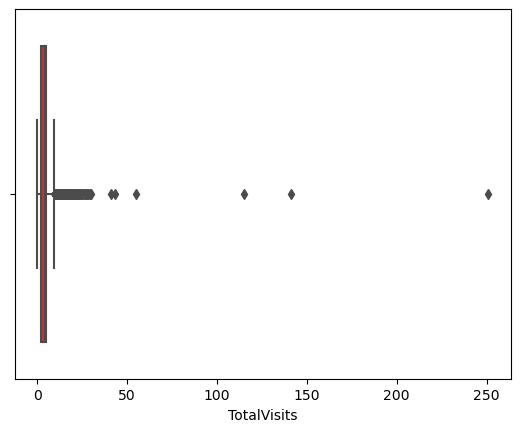

In [60]:
sns.boxplot(lead_data['TotalVisits'],orient='vert',palette='Set1')


In [61]:
percentiles = lead_data['TotalVisits'].quantile([0.05,0.95]).values
lead_data['TotalVisits'][lead_data['TotalVisits'] <= percentiles[0]] = percentiles[0]
lead_data['TotalVisits'][lead_data['TotalVisits'] >= percentiles[1]] = percentiles[1]

<AxesSubplot:xlabel='TotalVisits'>

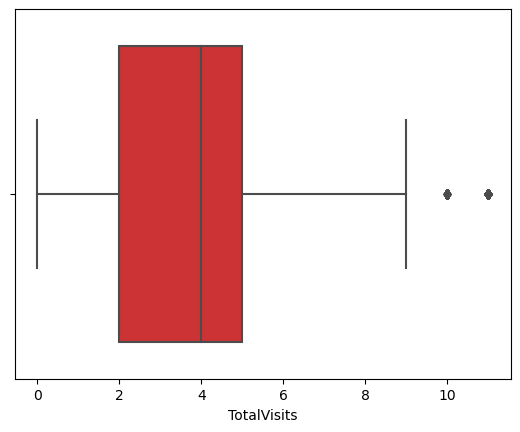

In [62]:
# Visualizing again
sns.boxplot(lead_data['TotalVisits'],orient='vert',palette='Set1')

<AxesSubplot:xlabel='Converted', ylabel='TotalVisits'>

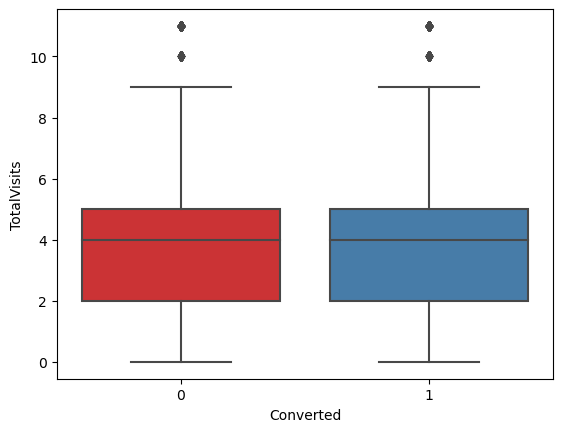

In [63]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_data,palette='Set1')


In [64]:
## 7) Total Time Spent on Website

In [65]:
lead_data['Total Time Spent on Website'].describe()


count    5792.000000
mean      604.620684
std       555.058578
min         0.000000
25%       131.750000
50%       367.000000
75%      1086.250000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

<AxesSubplot:xlabel='Total Time Spent on Website'>

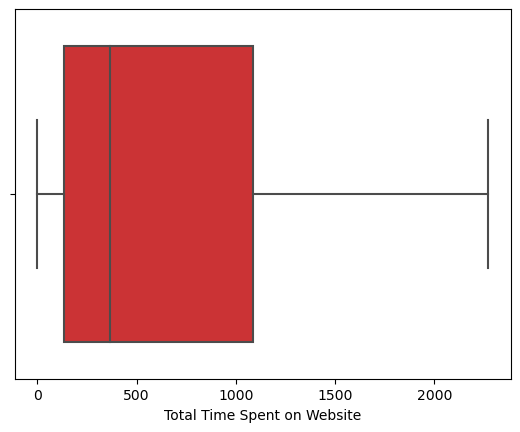

In [66]:
sns.boxplot(lead_data['Total Time Spent on Website'],orient='vert',palette='Set1')


<AxesSubplot:xlabel='Converted', ylabel='Total Time Spent on Website'>

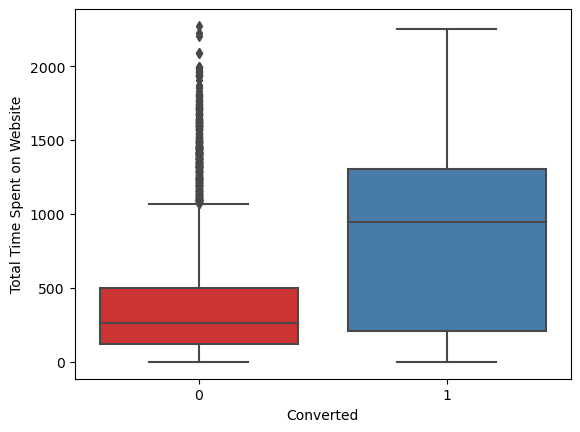

In [67]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead_data,palette='Set1')


In [68]:
## 8) Page Views Per Visit

In [69]:
lead_data['Page Views Per Visit'].describe()


count    5792.000000
mean        3.027082
std         2.104183
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

<AxesSubplot:xlabel='Page Views Per Visit'>

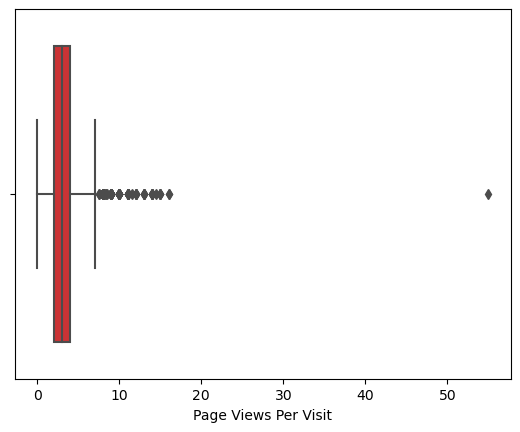

In [70]:
sns.boxplot(lead_data['Page Views Per Visit'],orient='vert',palette='Set1')


In [71]:
percentiles = lead_data['Page Views Per Visit'].quantile([0.05,0.95]).values
lead_data['Page Views Per Visit'][lead_data['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
lead_data['Page Views Per Visit'][lead_data['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

<AxesSubplot:xlabel='Page Views Per Visit'>

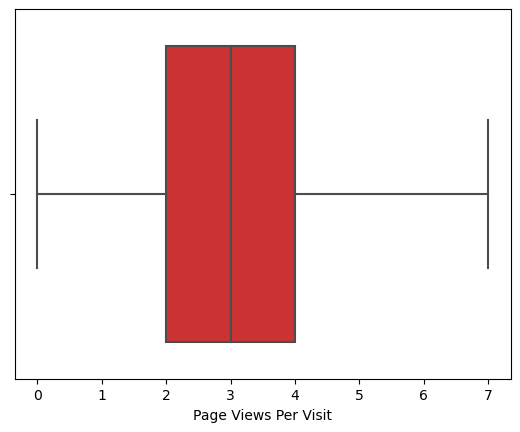

In [72]:
# Visualizing again
sns.boxplot(lead_data['Page Views Per Visit'],palette='Set1',orient='vert')

<AxesSubplot:xlabel='Converted', ylabel='Page Views Per Visit'>

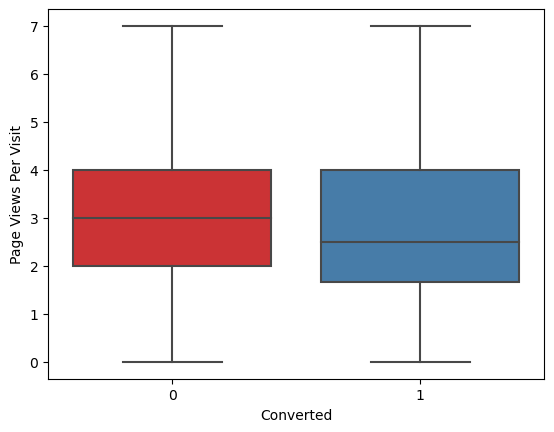

In [73]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data =lead_data,palette='Set1')


In [74]:
## 9) Last Activity

In [75]:
lead_data['Last Activity'].describe()


count             5792
unique              16
top       Email Opened
freq              2344
Name: Last Activity, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Email Opened'),
  Text(1, 0, 'Unreachable'),
  Text(2, 0, 'Page Visited on Website'),
  Text(3, 0, 'Email Bounced'),
  Text(4, 0, 'Converted to Lead'),
  Text(5, 0, 'Email Link Clicked'),
  Text(6, 0, 'Form Submitted on Website'),
  Text(7, 0, 'Unsubscribed'),
  Text(8, 0, 'Had a Phone Conversation'),
  Text(9, 0, 'View in browser link Clicked'),
  Text(10, 0, 'Olark Chat Conversation'),
  Text(11, 0, 'SMS Sent'),
  Text(12, 0, 'Visited Booth in Tradeshow'),
  Text(13, 0, 'Approached upfront'),
  Text(14, 0, 'Email Received'),
  Text(15, 0, 'Email Marked Spam')])

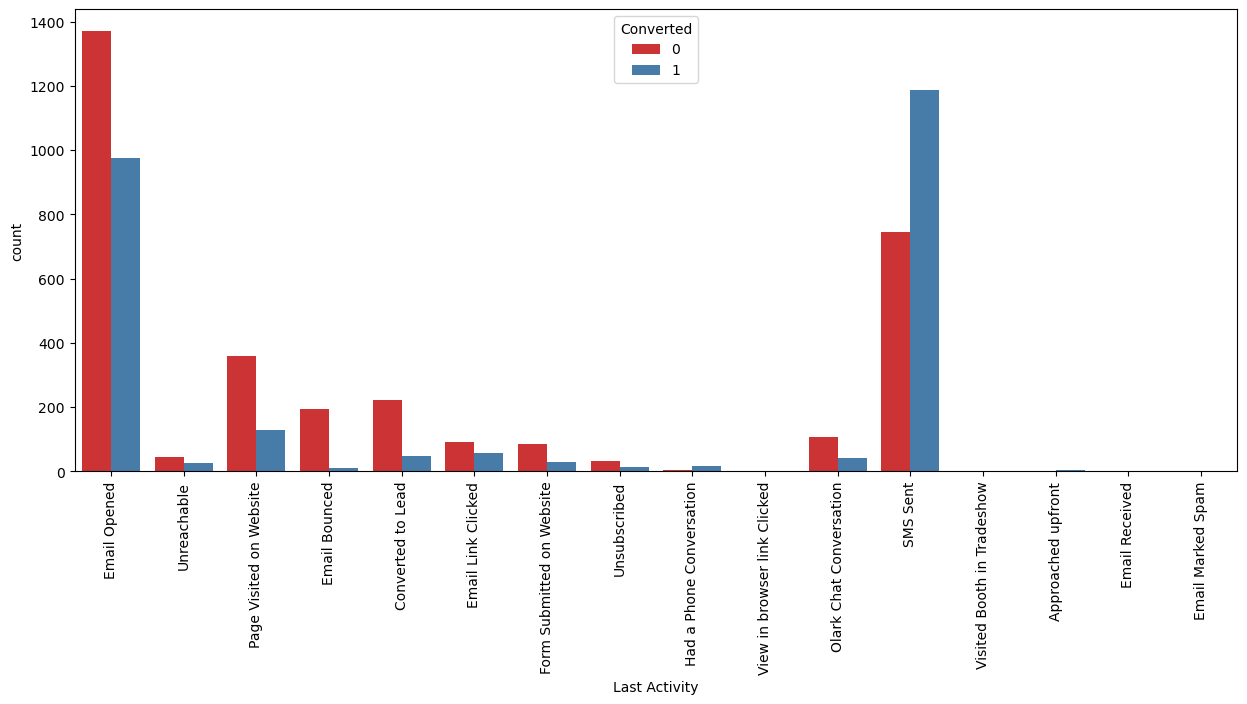

In [76]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

In [77]:
# We can club the last activities to "Other_Activity" which are having less data.
lead_data['Last Activity'] = lead_data['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Email Opened'),
  Text(1, 0, 'Unreachable'),
  Text(2, 0, 'Page Visited on Website'),
  Text(3, 0, 'Email Bounced'),
  Text(4, 0, 'Converted to Lead'),
  Text(5, 0, 'Email Link Clicked'),
  Text(6, 0, 'Form Submitted on Website'),
  Text(7, 0, 'Unsubscribed'),
  Text(8, 0, 'Other_Activity'),
  Text(9, 0, 'Olark Chat Conversation'),
  Text(10, 0, 'SMS Sent')])

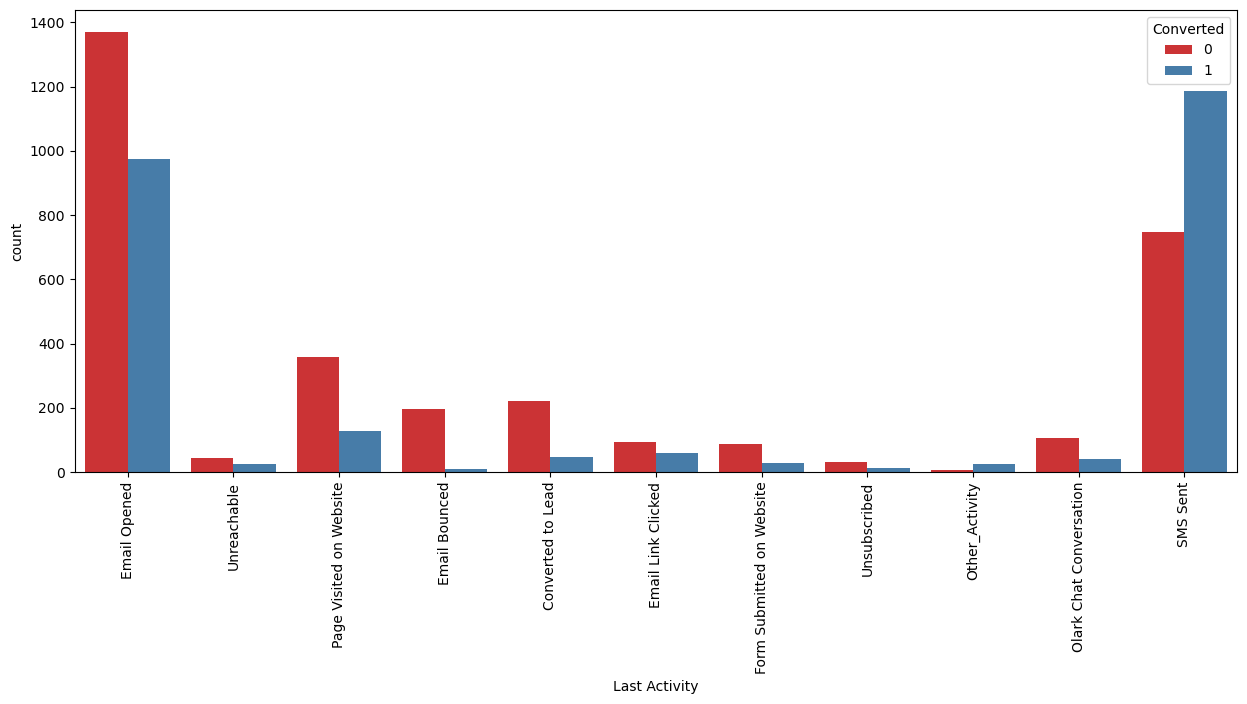

In [78]:
# Visualizing again
plt.figure(figsize=(15,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

In [79]:
## 10) Country

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]),
 [Text(0, 0, 'India'),
  Text(1, 0, 'Russia'),
  Text(2, 0, 'Kuwait'),
  Text(3, 0, 'Oman'),
  Text(4, 0, 'United States'),
  Text(5, 0, 'Bahrain'),
  Text(6, 0, 'Singapore'),
  Text(7, 0, 'United Kingdom'),
  Text(8, 0, 'Qatar'),
  Text(9, 0, 'Australia'),
  Text(10, 0, 'Ghana'),
  Text(11, 0, 'Saudi Arabia'),
  Text(12, 0, 'United Arab Emirates'),
  Text(13, 0, 'Belgium'),
  Text(14, 0, 'France'),
  Text(15, 0, 'China'),
  Text(16, 0, 'Canada'),
  Text(17, 0, 'Netherlands'),
  Text(18, 0, 'Sweden'),
  Text(19, 0, 'Nigeria'),
  Text(20, 0, 'Hong Kong'),
  Text(21, 0, 'Germany'),
  Text(22, 0, 'Uganda'),
  Text(23, 0, 'Kenya'),
  Text(24, 0, 'South Africa'),
  Text(25, 0, 'Tanzania'),
  Text(26, 0, 'Malaysia'),
  Text(27, 0, 'Liberia'),
  Text(28, 0, 'Italy'),
  Text(29, 0, 'Switzerland'),
  Text(30, 0, 'Denmark'),
  Text(

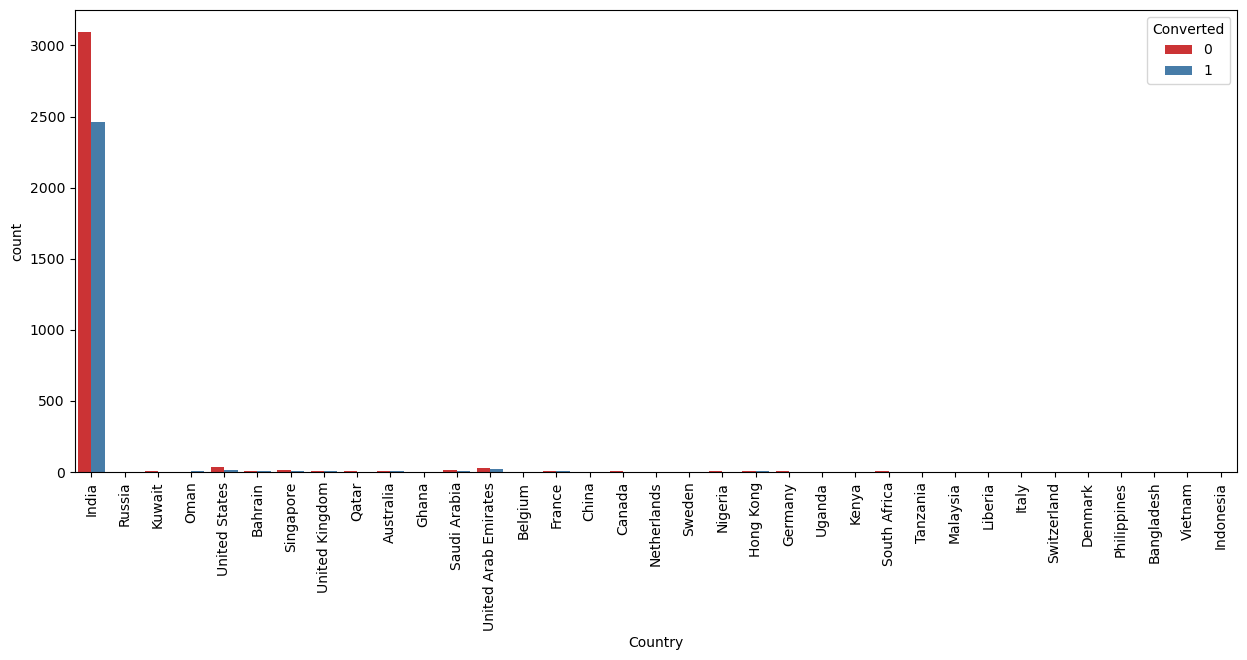

In [80]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Country", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

In [81]:
## 11) Specialization

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Business Administration'),
  Text(1, 0, 'Media and Advertising'),
  Text(2, 0, 'Supply Chain Management'),
  Text(3, 0, 'IT Projects Management'),
  Text(4, 0, 'Finance Management'),
  Text(5, 0, 'Travel and Tourism'),
  Text(6, 0, 'Human Resource Management'),
  Text(7, 0, 'Marketing Management'),
  Text(8, 0, 'Banking, Investment And Insurance'),
  Text(9, 0, 'International Business'),
  Text(10, 0, 'E-COMMERCE'),
  Text(11, 0, 'Operations Management'),
  Text(12, 0, 'Retail Management'),
  Text(13, 0, 'Services Excellence'),
  Text(14, 0, 'Hospitality Management'),
  Text(15, 0, 'Rural and Agribusiness'),
  Text(16, 0, 'Healthcare Management'),
  Text(17, 0, 'E-Business')])

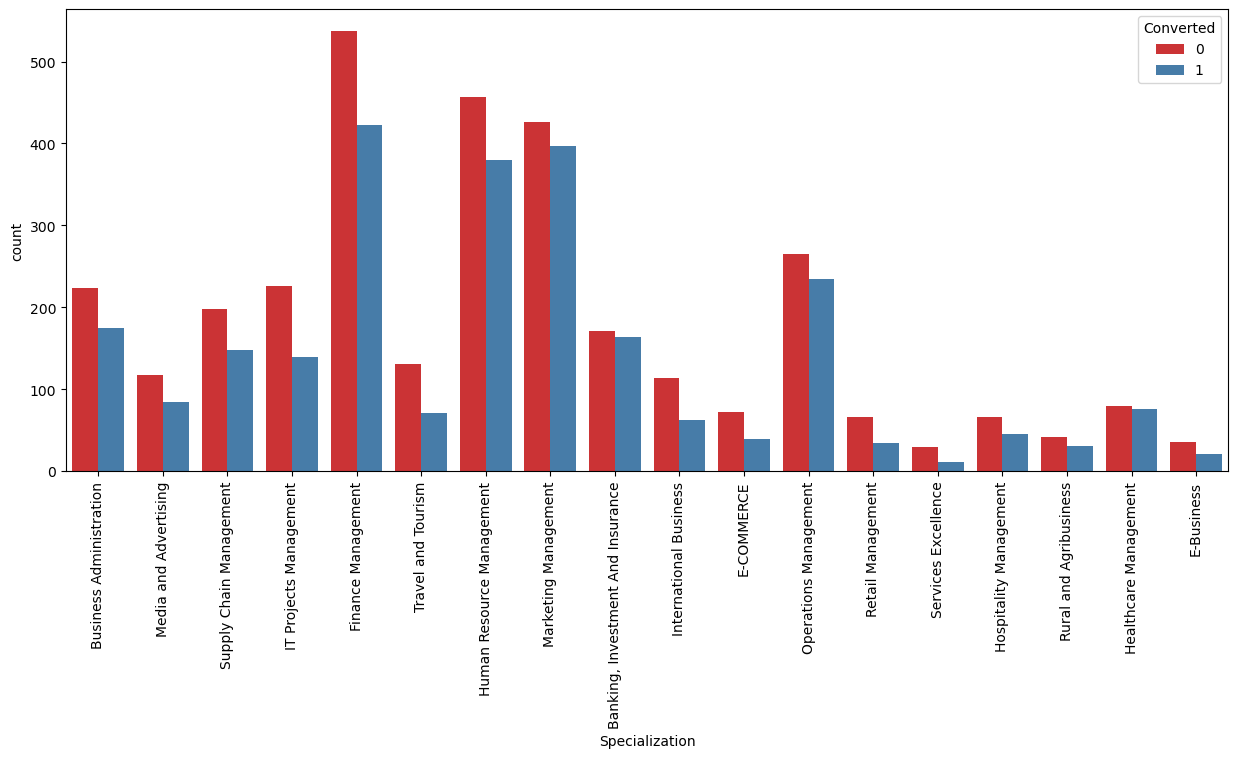

In [82]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Specialization", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

In [83]:
## 12) What is your current occupation

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Student'),
  Text(1, 0, 'Unemployed'),
  Text(2, 0, 'Working Professional'),
  Text(3, 0, 'Businessman'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Housewife')])

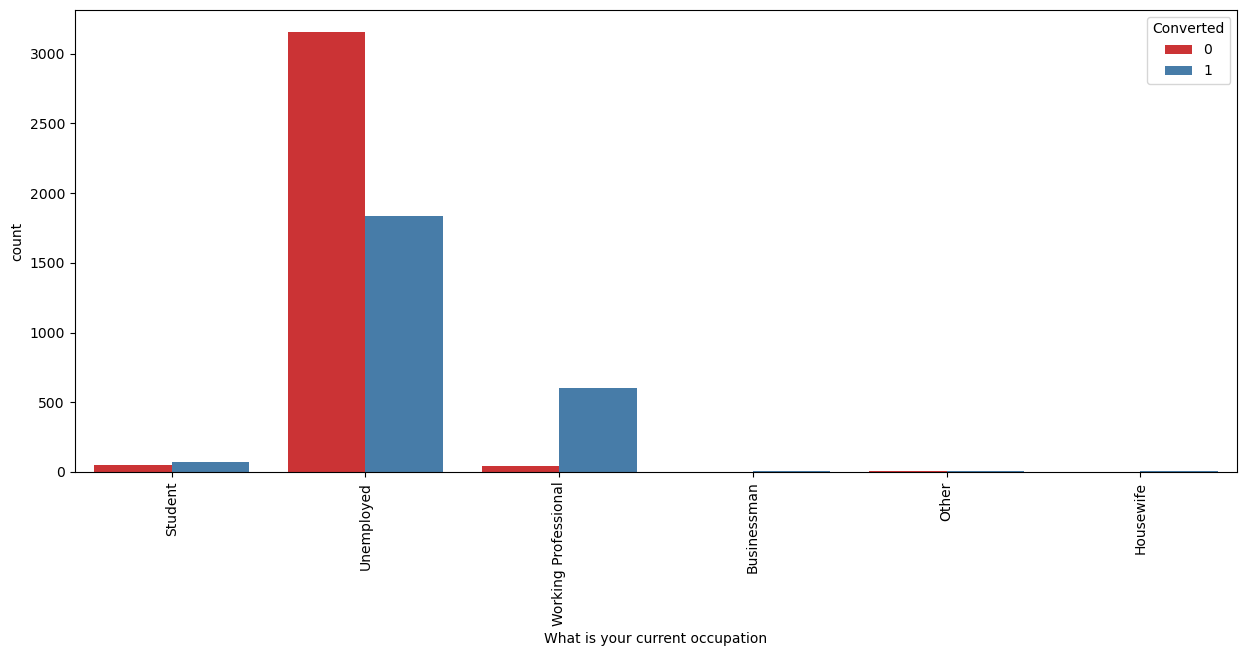

In [84]:
plt.figure(figsize=(15,6))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

In [85]:
## 13) Search

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

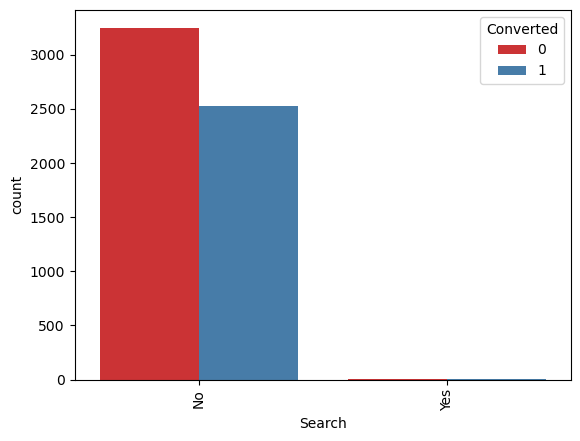

In [86]:
sns.countplot(x = "Search", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

In [87]:
## 14) Magazine

(array([0]), [Text(0, 0, 'No')])

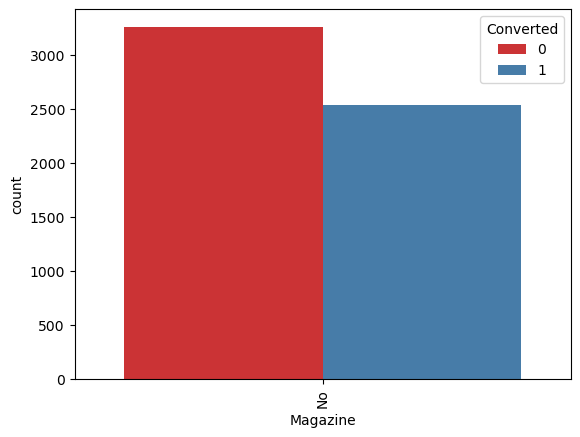

In [88]:
sns.countplot(x = "Magazine", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)


In [89]:
## 15) Newspaper Article

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

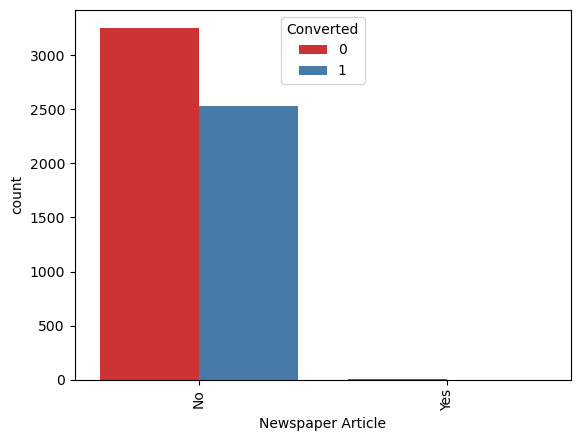

In [90]:
sns.countplot(x = "Newspaper Article", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

In [91]:
## 16) X Education Forums

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

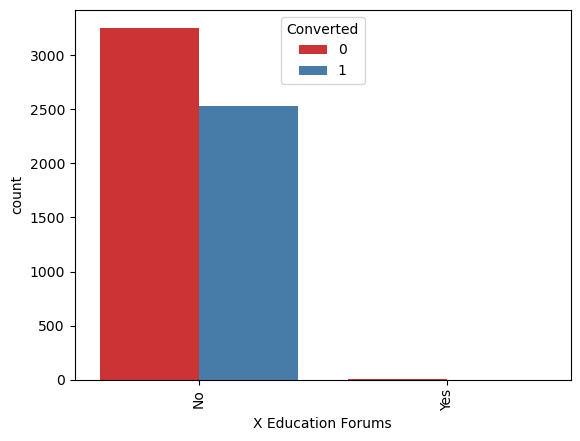

In [92]:
sns.countplot(x = "X Education Forums", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

In [93]:
## 17) Newspaper

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

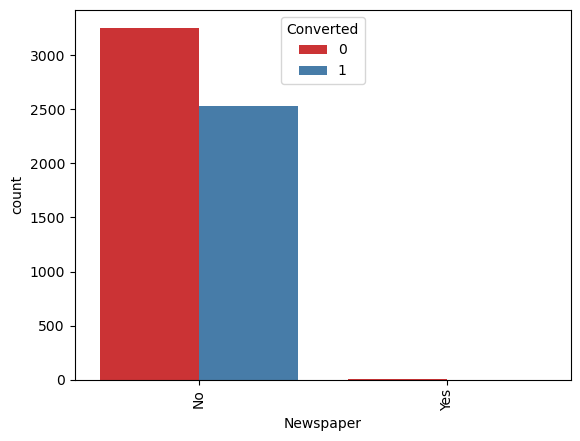

In [94]:
sns.countplot(x = "Newspaper", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

In [95]:
## 18) Digital Advertisement

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

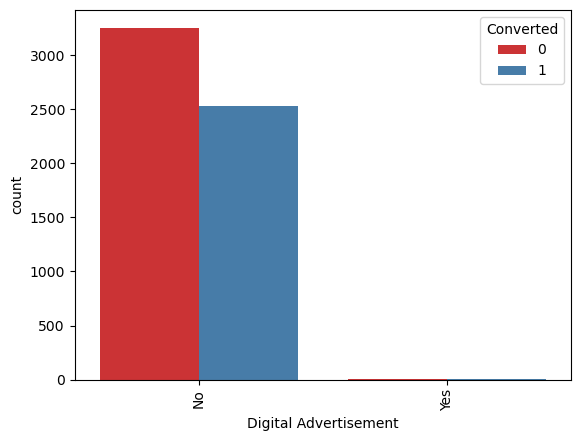

In [96]:
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

In [97]:
## 19) Through Recommendations

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

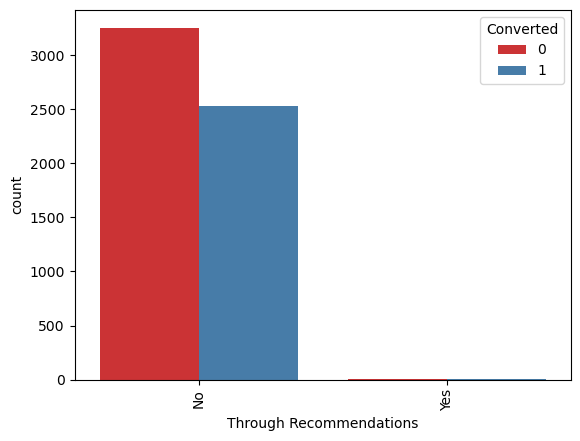

In [98]:
sns.countplot(x = "Through Recommendations", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

In [99]:
## 20) Receive More Updates About Our Courses

(array([0]), [Text(0, 0, 'No')])

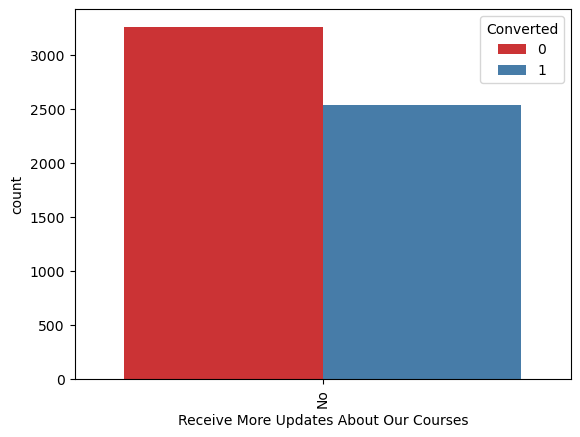

In [100]:
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

In [101]:
## 21) Tags

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'Will revert after reading the email'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Lost to EINS'),
  Text(3, 0, 'Interested in other courses'),
  Text(4, 0, 'Busy'),
  Text(5, 0, 'in touch with EINS'),
  Text(6, 0, 'Already a student'),
  Text(7, 0, 'Diploma holder (Not Eligible)'),
  Text(8, 0, 'Graduation in progress'),
  Text(9, 0, 'number not provided'),
  Text(10, 0, 'switched off'),
  Text(11, 0, 'Closed by Horizzon'),
  Text(12, 0, 'Not doing further education'),
  Text(13, 0, 'invalid number'),
  Text(14, 0, 'Interested  in full time MBA'),
  Text(15, 0, 'wrong number given'),
  Text(16, 0, 'opp hangup'),
  Text(17, 0, 'Still Thinking'),
  Text(18, 0, 'Lost to Others'),
  Text(19, 0, 'Shall take in the next coming month'),
  Text(20, 0, 'Interested in Next batch'),
  Text(21, 0, 'Recognition issue (DEC approval)'),
  Text(22, 0, 'Want to take admission 

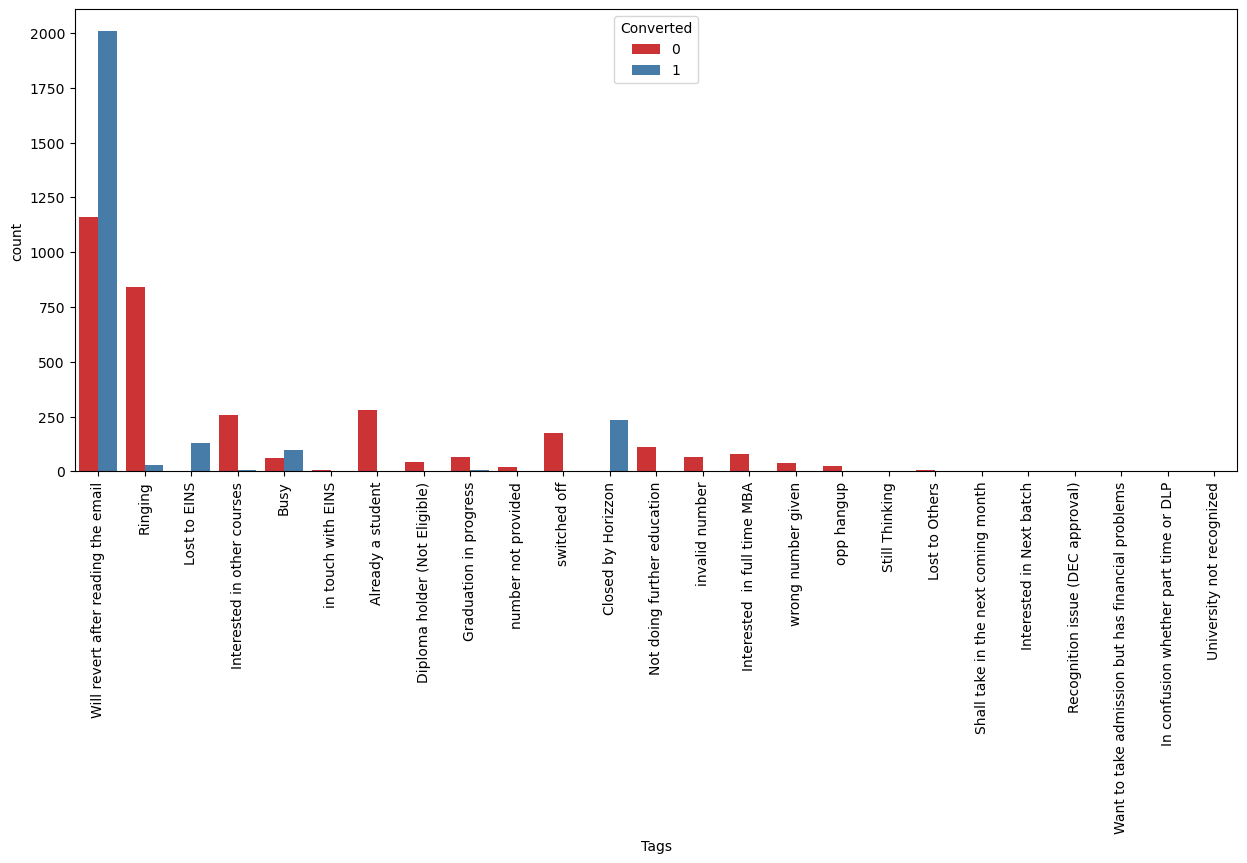

In [102]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Tags", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

In [103]:
## 22) Update me on Supply Chain Content

(array([0]), [Text(0, 0, 'No')])

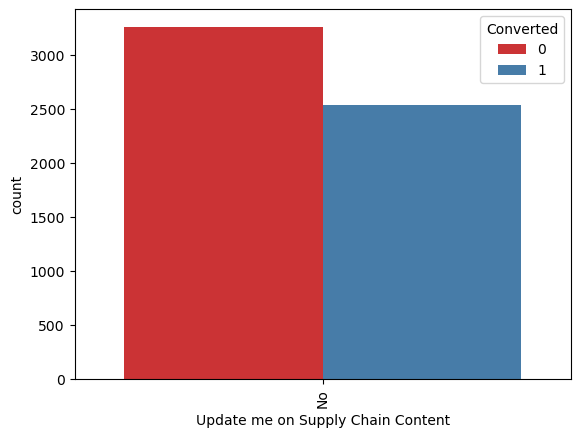

In [104]:
sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

In [105]:
## 23) Get updates on DM Content

(array([0]), [Text(0, 0, 'No')])

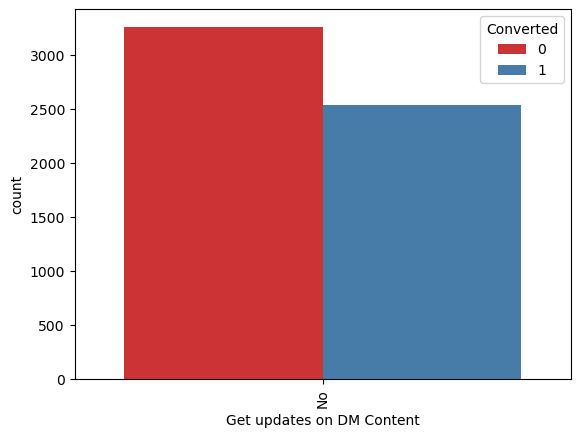

In [106]:
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

In [107]:
## 24) City

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Thane & Outskirts'),
  Text(2, 0, 'Other Metro Cities'),
  Text(3, 0, 'Other Cities'),
  Text(4, 0, 'Other Cities of Maharashtra'),
  Text(5, 0, 'Tier II Cities')])

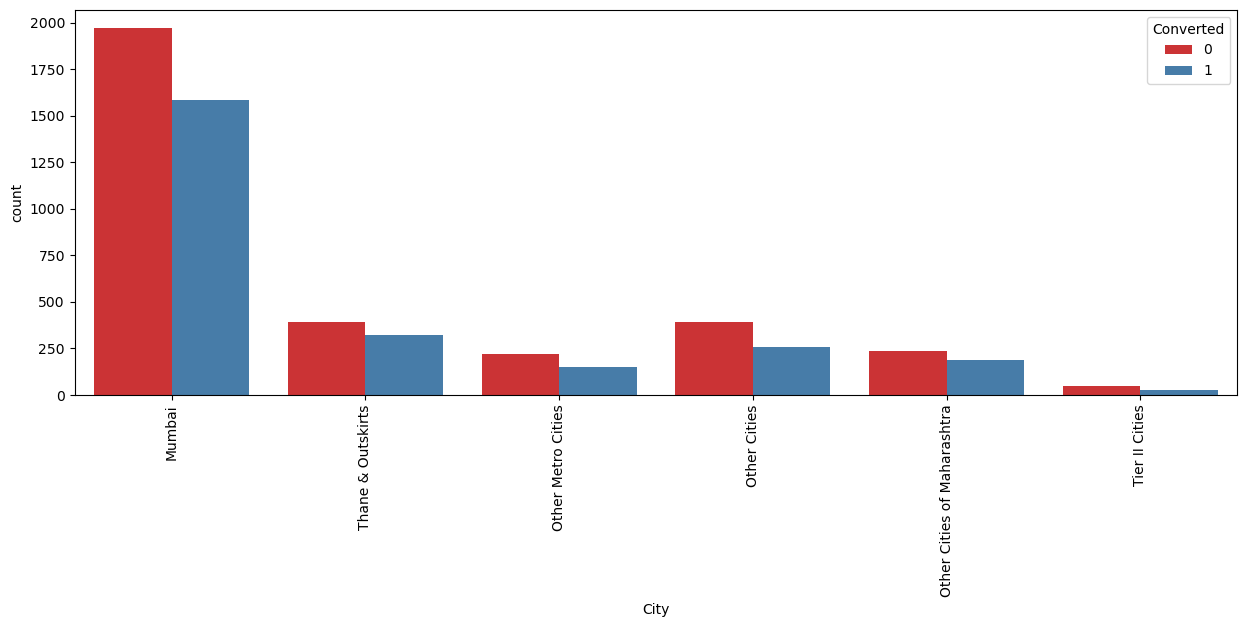

In [108]:
plt.figure(figsize=(15,5))
sns.countplot(x = "City", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

In [109]:
## 25) I agree to pay the amount through cheque

(array([0]), [Text(0, 0, 'No')])

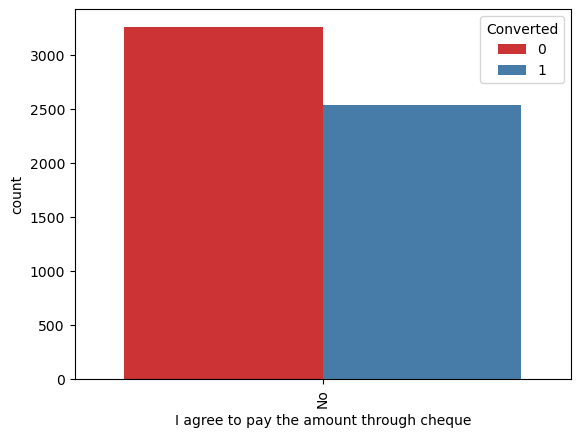

In [110]:
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

In [111]:
## 26) A free copy of Mastering The Interview

(array([0, 1]), [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

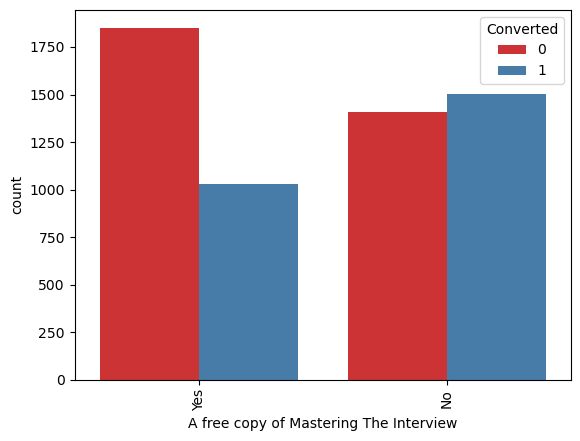

In [112]:
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

In [113]:
## 27) Last Notable Activity

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Email Opened'),
  Text(1, 0, 'Modified'),
  Text(2, 0, 'Page Visited on Website'),
  Text(3, 0, 'Email Bounced'),
  Text(4, 0, 'Email Link Clicked'),
  Text(5, 0, 'Unreachable'),
  Text(6, 0, 'Unsubscribed'),
  Text(7, 0, 'Had a Phone Conversation'),
  Text(8, 0, 'Olark Chat Conversation'),
  Text(9, 0, 'SMS Sent'),
  Text(10, 0, 'Approached upfront'),
  Text(11, 0, 'View in browser link Clicked'),
  Text(12, 0, 'Form Submitted on Website'),
  Text(13, 0, 'Email Received'),
  Text(14, 0, 'Email Marked Spam')])

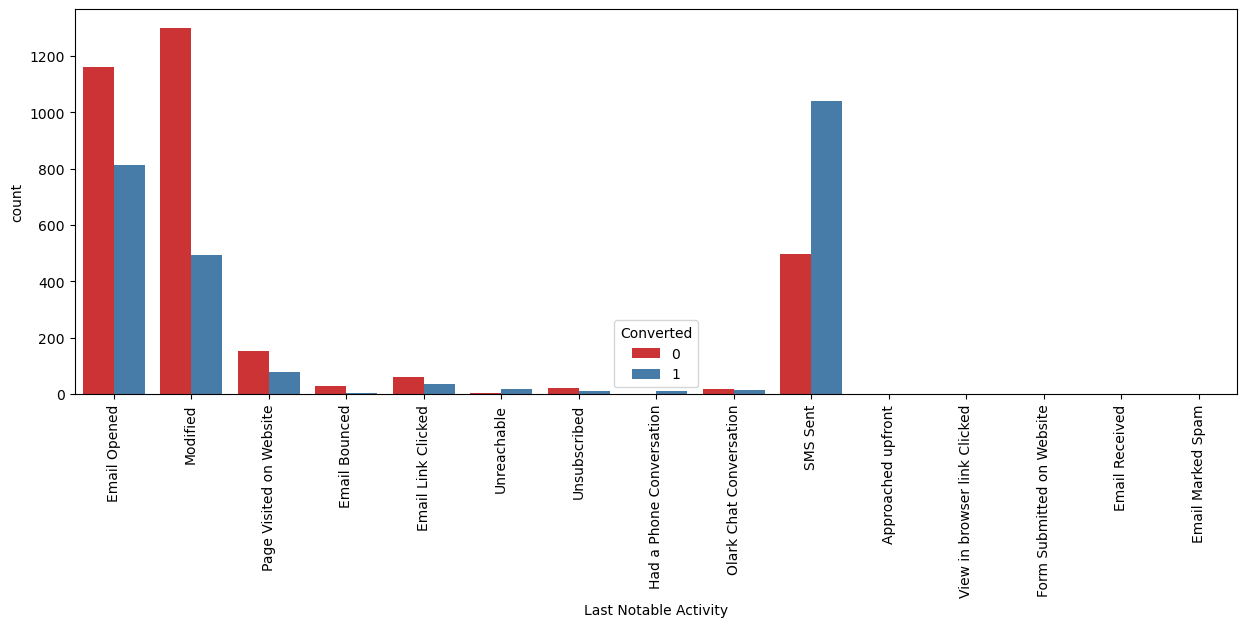

In [114]:
plt.figure(figsize=(15,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

In [115]:
lead_data = lead_data.drop(['Lead Number','Tags','Country','Search','Magazine','Newspaper Article','X Education Forums',
                            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                            'A free copy of Mastering The Interview'],1)

In [116]:
lead_data.shape

(5792, 14)

In [117]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5792 entries, 2 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      5792 non-null   object 
 1   Lead Origin                      5792 non-null   object 
 2   Lead Source                      5792 non-null   object 
 3   Do Not Email                     5792 non-null   object 
 4   Do Not Call                      5792 non-null   object 
 5   Converted                        5792 non-null   int64  
 6   TotalVisits                      5792 non-null   float64
 7   Total Time Spent on Website      5792 non-null   int64  
 8   Page Views Per Visit             5792 non-null   float64
 9   Last Activity                    5792 non-null   object 
 10  Specialization                   5792 non-null   object 
 11  What is your current occupation  5792 non-null   object 
 12  City                

In [118]:
# Data Preparation:-

In [119]:
##1) Converting some binary variables (Yes/No) to 1/0

In [120]:
vars =  ['Do Not Email', 'Do Not Call']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

lead_data[vars] = lead_data[vars].apply(binary_map)

In [121]:
##2) Creating Dummy variables for the categorical features:

In [122]:
# Creating a dummy variable for the categorical variables and dropping the first one.
dummy_data = pd.get_dummies(lead_data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity']], drop_first=True)
dummy_data.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [123]:
# Concatenating the dummy_data to the lead_data dataframe
lead_data = pd.concat([lead_data, dummy_data], axis=1)
lead_data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,0,1,0,0,0,0,0,0
6,9fae7df4-169d-489b-afe4-0f3d752542ed,Landing Page Submission,Google,0,0,1,2.0,1640,2.0,Email Opened,...,0,0,0,1,0,0,0,0,0,0
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,Landing Page Submission,Direct Traffic,0,0,0,2.0,71,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
9,af465dfc-7204-4130-9e05-33231863c4b5,API,Google,0,0,0,4.0,58,4.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0


In [124]:
lead_data = lead_data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity'], axis = 1)

In [125]:
lead_data.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
6,9fae7df4-169d-489b-afe4-0f3d752542ed,0,0,1,2.0,1640,2.0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,0,0,0,2.0,71,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,af465dfc-7204-4130-9e05-33231863c4b5,0,0,0,4.0,58,4.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [126]:
##3) Splitting the data into train and test set.

In [127]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = lead_data.drop(['Prospect ID','Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2,0,0,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,0,0,2.0,1640,2.0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
8,0,0,2.0,71,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,4.0,58,4.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [128]:
# Putting target variable to y
y = lead_data['Converted']

y.head()

2    1
3    0
6    1
8    0
9    0
Name: Converted, dtype: int64

In [129]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [130]:
##4) Scaling the features

In [131]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3188,0,0,-1.468777,-1.090099,-1.682914,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8278,0,0,-0.023792,-0.398625,0.616097,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
8129,0,0,1.059947,0.654011,-0.677097,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2393,0,0,-0.385038,0.394482,0.041344,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1016,0,0,-0.385038,-0.494815,0.041344,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [132]:
# Checking the Lead Conversion rate
Converted = (sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100
Converted

43.75

In [133]:
#Feature Selection Using RFE

In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
logreg = LogisticRegression()

rfe = RFE(estimator=logreg, n_features_to_select=20)
# running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [138]:
rfe.support_

array([ True, False, False,  True, False,  True,  True, False, False,
       False, False, False, False,  True,  True,  True, False,  True,
        True, False, False,  True, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True,  True, False, False, False, False, False, False,
        True, False,  True, False, False,  True,  True, False, False,
       False,  True, False, False])

In [139]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))


[('Do Not Email', True, 1),
 ('Do Not Call', False, 18),
 ('TotalVisits', False, 20),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 21),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 7),
 ('Lead Source_Facebook', False, 2),
 ('Lead Source_Google', False, 24),
 ('Lead Source_Olark Chat', False, 3),
 ('Lead Source_Organic Search', False, 37),
 ('Lead Source_Others', False, 15),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 10),
 ('Last Activity_Email Link Clicked', True, 1),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 12),
 ('Last Activity_Olark Chat Conversation', False, 19),
 ('Last Activity_Other_Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 31),
 ('Last Activity_SMS Sent', True, 1),
 (

In [140]:
# Viewing columns selected by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Other_Activity',
       'Last Activity_SMS Sent', 'Last Activity_Unsubscribed',
       'What is your current occupation_Housewife',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [142]:
# Model Building

##Assessing the model with StatsModels

In [143]:
## Model-1

In [144]:
import statsmodels.api as sm


In [145]:
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4054
Model:                            GLM   Df Residuals:                     4033
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1735.4
Date:                Mon, 26 Jun 2023   Deviance:                       3470.7
Time:                        23:55:31   Pearson chi2:                 4.71e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4032
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.0866      0.308      3.525      0.000       0.482       1.691
Do Not Email                                            -1.5833      0.235     -6.751      0.000      -2.043      -1.124
Total Time Spent on Website                              1.0551      0.046     23.146      0.000       0.966       1.144
Lead Origin_Landing Page Submission                     -1.2559      0.130     -9.630      0.000      -1.512      -1.000
Lead Origin_Lead Add Form                               -0.5896      1.401     -0.421      0.674      -3.335       2.156
Lead Source_Reference                                    3.7176      1.435      2.590      0.010       0.905       6.530
Lead Source_Referral Sites                               2.0265      0.576      3.518      0.000       0.897       3.155
Lead Source_Welingak Website                            24.4534   2.03e+04      0.001      0.999   -3.97e+04    3.97e+04
Last Activity_Email Link Clicked                         1.1667      0.494      2.364      0.018       0.199       2.134
Last Activity_Email Opened                               1.0146      0.202      5.026      0.000       0.619       1.410
Last Activity_Other_Activity                             1.5661      0.745      2.102      0.036       0.106       3.026
Last Activity_SMS Sent                                   1.2187      0.146      8.352      0.000       0.933       1.505
Last Activity_Unsubscribed                               1.4856      0.605      2.454      0.014       0.299       2.672
What is your current occupation_Housewife               23.1323   2.73e+04      0.001      0.999   -5.35e+04    5.36e+04
What is your current occupation_Unemployed              -0.8514      0.262     -3.246      0.001      -1.365      -0.337
What is your current occupation_Working Professional     2.1095      0.339      6.219      0.000       1.445       2.774
Last Notable Activity_Email Link Clicked                -1.3262      0.584     -2.270      0.023      -2.471      -0.181
Last Notable Activity_Email Opened                      -1.0039      0.224     -4.478      0.000      -1.443      -0.564
Last Notable Activity_Had a Phone Conversation           1.8233      1.316      1.386      0.166      -0.755       4.402
Last Notable Activity_Modified                          -1.1342      0.140     -8.129      0.000      -1.408      -0.861
Last Notable Activity_Unreachable                        1.0993      0.646      1.702      0.089      -0.167       2.366
========================================================================================================================
"""

In [146]:
# Dropping the column 'What is your current occupation_Housewife'
col1 = cols.drop('What is your current occupation_Housewife')

In [147]:
## Model-2

In [148]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4054
Model:                            GLM   Df Residuals:                     4034
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1738.2
Date:                Mon, 26 Jun 2023   Deviance:                       3476.3
Time:                        23:55:53   Pearson chi2:                 4.72e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4024
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.1941      0.304      3.931      0.000       0.599       1.790
Do Not Email                                            -1.5853      0.235     -6.760      0.000      -2.045      -1.126
Total Time Spent on Website                              1.0537      0.046     23.128      0.000       0.964       1.143
Lead Origin_Landing Page Submission                     -1.2503      0.130     -9.590      0.000      -1.506      -0.995
Lead Origin_Lead Add Form                               -0.5886      1.400     -0.421      0.674      -3.332       2.154
Lead Source_Reference                                    3.7281      1.434      2.600      0.009       0.918       6.538
Lead Source_Referral Sites                               2.0264      0.576      3.518      0.000       0.897       3.155
Lead Source_Welingak Website                            23.4526   1.23e+04      0.002      0.998   -2.41e+04    2.41e+04
Last Activity_Email Link Clicked                         1.1641      0.494      2.359      0.018       0.197       2.131
Last Activity_Email Opened                               1.0289      0.201      5.113      0.000       0.635       1.423
Last Activity_Other_Activity                             1.5699      0.745      2.107      0.035       0.110       3.030
Last Activity_SMS Sent                                   1.2208      0.146      8.367      0.000       0.935       1.507
Last Activity_Unsubscribed                               1.4906      0.605      2.463      0.014       0.304       2.677
What is your current occupation_Unemployed              -0.9671      0.256     -3.776      0.000      -1.469      -0.465
What is your current occupation_Working Professional     1.9941      0.334      5.964      0.000       1.339       2.649
Last Notable Activity_Email Link Clicked                -1.3186      0.584     -2.259      0.024      -2.463      -0.175
Last Notable Activity_Email Opened                      -1.0140      0.224     -4.535      0.000      -1.452      -0.576
Last Notable Activity_Had a Phone Conversation           1.8219      1.315      1.385      0.166      -0.756       4.400
Last Notable Activity_Modified                          -1.1346      0.140     -8.132      0.000      -1.408      -0.861
Last Notable Activity_Unreachable                        1.1027      0.646      1.707      0.088      -0.163       2.369
========================================================================================================================
"""

In [149]:
col1 = col1.drop('Last Notable Activity_Had a Phone Conversation')


In [150]:
##Model-3

In [151]:
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4054
Model:                            GLM   Df Residuals:                     4035
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1739.3
Date:                Mon, 26 Jun 2023   Deviance:                       3478.6
Time:                        23:56:17   Pearson chi2:                 4.72e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4021
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.2094      0.304      3.983      0.000       0.614       1.805
Do Not Email                                            -1.5916      0.235     -6.779      0.000      -2.052      -1.131
Total Time Spent on Website                              1.0521      0.046     23.106      0.000       0.963       1.141
Lead Origin_Landing Page Submission                     -1.2504      0.130     -9.594      0.000      -1.506      -0.995
Lead Origin_Lead Add Form                               -0.5895      1.399     -0.421      0.673      -3.331       2.152
Lead Source_Reference                                    3.7229      1.433      2.597      0.009       0.914       6.532
Lead Source_Referral Sites                               2.0259      0.576      3.517      0.000       0.897       3.155
Lead Source_Welingak Website                            23.4522   1.23e+04      0.002      0.998   -2.41e+04    2.41e+04
Last Activity_Email Link Clicked                         1.1704      0.493      2.372      0.018       0.203       2.137
Last Activity_Email Opened                               1.0356      0.201      5.147      0.000       0.641       1.430
Last Activity_Other_Activity                             2.3121      0.573      4.038      0.000       1.190       3.434
Last Activity_SMS Sent                                   1.2105      0.146      8.307      0.000       0.925       1.496
Last Activity_Unsubscribed                               1.4875      0.605      2.458      0.014       0.301       2.674
What is your current occupation_Unemployed              -0.9673      0.256     -3.777      0.000      -1.469      -0.465
What is your current occupation_Working Professional     1.9916      0.334      5.955      0.000       1.336       2.647
Last Notable Activity_Email Link Clicked                -1.3394      0.583     -2.296      0.022      -2.483      -0.196
Last Notable Activity_Email Opened                      -1.0352      0.223     -4.639      0.000      -1.473      -0.598
Last Notable Activity_Modified                          -1.1555      0.139     -8.316      0.000      -1.428      -0.883
Last Notable Activity_Unreachable                        1.0877      0.646      1.685      0.092      -0.178       2.353
========================================================================================================================
"""

In [153]:
##Model-4

In [154]:
X_train_sm = sm.add_constant(X_train[col1])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4054
Model:                            GLM   Df Residuals:                     4035
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1739.3
Date:                Mon, 26 Jun 2023   Deviance:                       3478.6
Time:                        23:56:54   Pearson chi2:                 4.72e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4021
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.2094      0.304      3.983      0.000       0.614       1.805
Do Not Email                                            -1.5916      0.235     -6.779      0.000      -2.052      -1.131
Total Time Spent on Website                              1.0521      0.046     23.106      0.000       0.963       1.141
Lead Origin_Landing Page Submission                     -1.2504      0.130     -9.594      0.000      -1.506      -0.995
Lead Origin_Lead Add Form                               -0.5895      1.399     -0.421      0.673      -3.331       2.152
Lead Source_Reference                                    3.7229      1.433      2.597      0.009       0.914       6.532
Lead Source_Referral Sites                               2.0259      0.576      3.517      0.000       0.897       3.155
Lead Source_Welingak Website                            23.4522   1.23e+04      0.002      0.998   -2.41e+04    2.41e+04
Last Activity_Email Link Clicked                         1.1704      0.493      2.372      0.018       0.203       2.137
Last Activity_Email Opened                               1.0356      0.201      5.147      0.000       0.641       1.430
Last Activity_Other_Activity                             2.3121      0.573      4.038      0.000       1.190       3.434
Last Activity_SMS Sent                                   1.2105      0.146      8.307      0.000       0.925       1.496
Last Activity_Unsubscribed                               1.4875      0.605      2.458      0.014       0.301       2.674
What is your current occupation_Unemployed              -0.9673      0.256     -3.777      0.000      -1.469      -0.465
What is your current occupation_Working Professional     1.9916      0.334      5.955      0.000       1.336       2.647
Last Notable Activity_Email Link Clicked                -1.3394      0.583     -2.296      0.022      -2.483      -0.196
Last Notable Activity_Email Opened                      -1.0352      0.223     -4.639      0.000      -1.473      -0.598
Last Notable Activity_Modified                          -1.1555      0.139     -8.316      0.000      -1.428      -0.883
Last Notable Activity_Unreachable                        1.0877      0.646      1.685      0.092      -0.178       2.353
========================================================================================================================
"""

In [155]:
col1 = col1.drop('Lead Origin_Lead Add Form')


In [156]:
##Model-5

In [157]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4054
Model:                            GLM   Df Residuals:                     4036
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1739.4
Date:                Mon, 26 Jun 2023   Deviance:                       3478.8
Time:                        23:57:17   Pearson chi2:                 4.72e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4021
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.2066      0.304      3.975      0.000       0.612       1.802
Do Not Email                                            -1.5918      0.235     -6.780      0.000      -2.052      -1.132
Total Time Spent on Website                              1.0522      0.046     23.110      0.000       0.963       1.141
Lead Origin_Landing Page Submission                     -1.2459      0.130     -9.593      0.000      -1.500      -0.991
Lead Source_Reference                                    3.1384      0.358      8.778      0.000       2.438       3.839
Lead Source_Referral Sites                               2.0274      0.576      3.520      0.000       0.899       3.156
Lead Source_Welingak Website                            22.8682   1.23e+04      0.002      0.999   -2.41e+04    2.41e+04
Last Activity_Email Link Clicked                         1.1699      0.493      2.371      0.018       0.203       2.137
Last Activity_Email Opened                               1.0327      0.201      5.137      0.000       0.639       1.427
Last Activity_Other_Activity                             2.3118      0.573      4.038      0.000       1.190       3.434
Last Activity_SMS Sent                                   1.2101      0.146      8.305      0.000       0.925       1.496
Last Activity_Unsubscribed                               1.4870      0.605      2.457      0.014       0.301       2.673
What is your current occupation_Unemployed              -0.9683      0.256     -3.781      0.000      -1.470      -0.466
What is your current occupation_Working Professional     1.9916      0.334      5.955      0.000       1.336       2.647
Last Notable Activity_Email Link Clicked                -1.3390      0.583     -2.295      0.022      -2.482      -0.196
Last Notable Activity_Email Opened                      -1.0336      0.223     -4.634      0.000      -1.471      -0.596
Last Notable Activity_Modified                          -1.1554      0.139     -8.316      0.000      -1.428      -0.883
Last Notable Activity_Unreachable                        1.0881      0.646      1.685      0.092      -0.177       2.354
========================================================================================================================
"""

In [158]:
## Checking for VIF values:

In [159]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_Unemployed,11.78
14,Last Notable Activity_Email Opened,9.54
7,Last Activity_Email Opened,8.81
2,Lead Origin_Landing Page Submission,7.35
13,Last Notable Activity_Email Link Clicked,3.46
6,Last Activity_Email Link Clicked,3.44
9,Last Activity_SMS Sent,3.35
15,Last Notable Activity_Modified,2.90
12,What is your current occupation_Working Profes...,2.35
3,Lead Source_Reference,1.57


In [160]:
# Dropping the column  'What is your current occupation_Unemployed' because it has high VIF
col1 = col1.drop('What is your current occupation_Unemployed')

In [161]:
##Model-6

In [162]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4054
Model:                            GLM   Df Residuals:                     4037
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1746.5
Date:                Mon, 26 Jun 2023   Deviance:                       3493.0
Time:                        23:57:57   Pearson chi2:                 4.74e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3999
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2808      0.179      1.571      0.116      -0.070       0.631
Do Not Email                                            -1.5830      0.235     -6.742      0.000      -2.043      -1.123
Total Time Spent on Website                              1.0514      0.045     23.140      0.000       0.962       1.140
Lead Origin_Landing Page Submission                     -1.2598      0.130     -9.722      0.000      -1.514      -1.006
Lead Source_Reference                                    3.1641      0.357      8.869      0.000       2.465       3.863
Lead Source_Referral Sites                               1.9909      0.576      3.458      0.001       0.863       3.119
Lead Source_Welingak Website                            22.8226   1.23e+04      0.002      0.999   -2.41e+04    2.41e+04
Last Activity_Email Link Clicked                         1.1840      0.495      2.394      0.017       0.215       2.153
Last Activity_Email Opened                               1.0295      0.201      5.123      0.000       0.636       1.423
Last Activity_Other_Activity                             2.2800      0.572      3.983      0.000       1.158       3.402
Last Activity_SMS Sent                                   1.1905      0.145      8.190      0.000       0.906       1.475
Last Activity_Unsubscribed                               1.4501      0.605      2.397      0.017       0.264       2.636
What is your current occupation_Working Professional     2.9288      0.225     13.003      0.000       2.487       3.370
Last Notable Activity_Email Link Clicked                -1.3566      0.584     -2.323      0.020      -2.501      -0.212
Last Notable Activity_Email Opened                      -1.0194      0.223     -4.576      0.000      -1.456      -0.583
Last Notable Activity_Modified                          -1.1526      0.139     -8.308      0.000      -1.424      -0.881
Last Notable Activity_Unreachable                        1.0559      0.646      1.636      0.102      -0.209       2.321
========================================================================================================================
"""

In [164]:
##Model-7

In [165]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4054
Model:                            GLM   Df Residuals:                     4037
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1746.5
Date:                Mon, 26 Jun 2023   Deviance:                       3493.0
Time:                        23:58:31   Pearson chi2:                 4.74e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3999
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2808      0.179      1.571      0.116      -0.070       0.631
Do Not Email                                            -1.5830      0.235     -6.742      0.000      -2.043      -1.123
Total Time Spent on Website                              1.0514      0.045     23.140      0.000       0.962       1.140
Lead Origin_Landing Page Submission                     -1.2598      0.130     -9.722      0.000      -1.514      -1.006
Lead Source_Reference                                    3.1641      0.357      8.869      0.000       2.465       3.863
Lead Source_Referral Sites                               1.9909      0.576      3.458      0.001       0.863       3.119
Lead Source_Welingak Website                            22.8226   1.23e+04      0.002      0.999   -2.41e+04    2.41e+04
Last Activity_Email Link Clicked                         1.1840      0.495      2.394      0.017       0.215       2.153
Last Activity_Email Opened                               1.0295      0.201      5.123      0.000       0.636       1.423
Last Activity_Other_Activity                             2.2800      0.572      3.983      0.000       1.158       3.402
Last Activity_SMS Sent                                   1.1905      0.145      8.190      0.000       0.906       1.475
Last Activity_Unsubscribed                               1.4501      0.605      2.397      0.017       0.264       2.636
What is your current occupation_Working Professional     2.9288      0.225     13.003      0.000       2.487       3.370
Last Notable Activity_Email Link Clicked                -1.3566      0.584     -2.323      0.020      -2.501      -0.212
Last Notable Activity_Email Opened                      -1.0194      0.223     -4.576      0.000      -1.456      -0.583
Last Notable Activity_Modified                          -1.1526      0.139     -8.308      0.000      -1.424      -0.881
Last Notable Activity_Unreachable                        1.0559      0.646      1.636      0.102      -0.209       2.321
========================================================================================================================
"""

In [166]:
###Checking for VIF values:

In [167]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Last Notable Activity_Email Opened,8.83
7,Last Activity_Email Opened,8.66
2,Lead Origin_Landing Page Submission,5.03
6,Last Activity_Email Link Clicked,3.43
12,Last Notable Activity_Email Link Clicked,3.41
9,Last Activity_SMS Sent,2.33
14,Last Notable Activity_Modified,2.23
3,Lead Source_Reference,1.47
0,Do Not Email,1.31
11,What is your current occupation_Working Profes...,1.26


In [168]:
# Dropping the column  'Last Activity_Unsubscribed' to reduce the variables
col1 = col1.drop('Last Activity_Unsubscribed')

In [169]:
##Model-8

In [170]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4054
Model:                            GLM   Df Residuals:                     4038
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1749.0
Date:                Mon, 26 Jun 2023   Deviance:                       3498.0
Time:                        23:59:14   Pearson chi2:                 4.74e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3992
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3150      0.178      1.773      0.076      -0.033       0.663
Do Not Email                                            -1.4387      0.219     -6.563      0.000      -1.868      -1.009
Total Time Spent on Website                              1.0520      0.045     23.160      0.000       0.963       1.141
Lead Origin_Landing Page Submission                     -1.2560      0.129     -9.704      0.000      -1.510      -1.002
Lead Source_Reference                                    3.1657      0.357      8.877      0.000       2.467       3.865
Lead Source_Referral Sites                               1.9711      0.571      3.451      0.001       0.852       3.091
Lead Source_Welingak Website                            22.8282   1.23e+04      0.002      0.999    -2.4e+04    2.41e+04
Last Activity_Email Link Clicked                         1.1666      0.494      2.361      0.018       0.198       2.135
Last Activity_Email Opened                               1.0144      0.201      5.058      0.000       0.621       1.407
Last Activity_Other_Activity                             2.2469      0.572      3.930      0.000       1.126       3.367
Last Activity_SMS Sent                                   1.1491      0.144      8.000      0.000       0.868       1.431
What is your current occupation_Working Professional     2.9310      0.225     13.030      0.000       2.490       3.372
Last Notable Activity_Email Link Clicked                -1.3759      0.584     -2.357      0.018      -2.520      -0.232
Last Notable Activity_Email Opened                      -1.0419      0.222     -4.683      0.000      -1.478      -0.606
Last Notable Activity_Modified                          -1.1750      0.138     -8.497      0.000      -1.446      -0.904
Last Notable Activity_Unreachable                        1.0156      0.644      1.577      0.115      -0.247       2.278
========================================================================================================================
"""

In [171]:
###Checking for VIF values:

In [172]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Last Notable Activity_Email Opened,8.82
7,Last Activity_Email Opened,8.66
2,Lead Origin_Landing Page Submission,4.99
6,Last Activity_Email Link Clicked,3.43
11,Last Notable Activity_Email Link Clicked,3.41
9,Last Activity_SMS Sent,2.31
13,Last Notable Activity_Modified,2.22
3,Lead Source_Reference,1.47
10,What is your current occupation_Working Profes...,1.26
0,Do Not Email,1.25


In [173]:
# Dropping the column  'Last Notable Activity_Unreachable' to reduce the variables
col1 = col1.drop('Last Notable Activity_Unreachable')

In [174]:
##Model-9

In [175]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4054
Model:                            GLM   Df Residuals:                     4039
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1750.3
Date:                Mon, 26 Jun 2023   Deviance:                       3500.6
Time:                        23:59:49   Pearson chi2:                 4.73e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3988
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3675      0.174      2.107      0.035       0.026       0.709
Do Not Email                                            -1.4537      0.219     -6.636      0.000      -1.883      -1.024
Total Time Spent on Website                              1.0510      0.045     23.156      0.000       0.962       1.140
Lead Origin_Landing Page Submission                     -1.2595      0.129     -9.737      0.000      -1.513      -1.006
Lead Source_Reference                                    3.1724      0.356      8.902      0.000       2.474       3.871
Lead Source_Referral Sites                               1.9892      0.567      3.507      0.000       0.877       3.101
Lead Source_Welingak Website                            22.8238   1.23e+04      0.002      0.999    -2.4e+04    2.41e+04
Last Activity_Email Link Clicked                         1.1486      0.494      2.326      0.020       0.181       2.117
Last Activity_Email Opened                               0.9956      0.200      4.979      0.000       0.604       1.387
Last Activity_Other_Activity                             2.2118      0.572      3.867      0.000       1.091       3.333
Last Activity_SMS Sent                                   1.1067      0.141      7.859      0.000       0.831       1.383
What is your current occupation_Working Professional     2.9270      0.225     13.024      0.000       2.487       3.367
Last Notable Activity_Email Link Clicked                -1.4083      0.583     -2.414      0.016      -2.552      -0.265
Last Notable Activity_Email Opened                      -1.0725      0.222     -4.839      0.000      -1.507      -0.638
Last Notable Activity_Modified                          -1.2059      0.137     -8.808      0.000      -1.474      -0.938
========================================================================================================================
"""

In [176]:
###Checking for VIF values:

In [177]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Last Notable Activity_Email Opened,8.81
7,Last Activity_Email Opened,8.66
2,Lead Origin_Landing Page Submission,4.94
6,Last Activity_Email Link Clicked,3.43
11,Last Notable Activity_Email Link Clicked,3.41
9,Last Activity_SMS Sent,2.30
13,Last Notable Activity_Modified,2.21
3,Lead Source_Reference,1.46
10,What is your current occupation_Working Profes...,1.26
0,Do Not Email,1.25


In [178]:
###Making Prediction on the Train set

In [179]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3188    0.970713
8278    0.179271
8129    0.711375
2393    0.669328
1016    0.180757
1724    0.156871
48      0.587246
8842    0.012109
7812    0.324808
3008    0.553384
dtype: float64

In [180]:
# Reshaping into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.97071277, 0.17927147, 0.71137497, 0.66932845, 0.18075709,
       0.156871  , 0.58724617, 0.01210872, 0.32480791, 0.55338442])

In [181]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.970713,3188
1,0,0.179271,8278
2,0,0.711375,8129
3,1,0.669328,2393
4,0,0.180757,1016


In [182]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.970713,3188,1
1,0,0.179271,8278,0
2,0,0.711375,8129,1
3,1,0.669328,2393,1
4,0,0.180757,1016,0


In [183]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[1958  308]
 [ 485 1303]]


In [184]:
# The confusion matrix indicates as below
# Predicted     not_converted    converted
# Actual
# not_converted        3461      444
# converted            719       1727 

In [185]:
# Let's check the overall accuracy.
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy : 0.8043907252096695


In [186]:
###Metrics beyond simply accuracy

In [187]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [188]:
# Sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.7287472035794184


In [189]:
# Let us calculate specificity
print("Specificity : ",TN / float(TN+FP))

Specificity :  0.8640776699029126


In [190]:
# Calculate false postive rate - predicting converted lead when the lead actually was not converted
print("False Positive Rate :",FP/ float(TN+FP))

False Positive Rate : 0.13592233009708737


In [191]:
# positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.8088144009931719


In [192]:
# Negative predictive value
print ("Negative predictive value :",TN / float(TN+ FN))

Negative predictive value : 0.8014735980352026


In [193]:
## Plotting the ROC Curve

In [194]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [195]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )


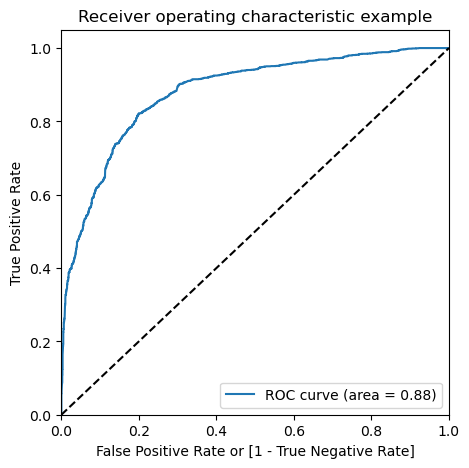

In [196]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)


In [197]:
## Finding Optimal Cutoff Point

In [198]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.970713,3188,1,1,1,1,1,1,1,1,1,1,1
1,0,0.179271,8278,0,1,1,0,0,0,0,0,0,0,0
2,0,0.711375,8129,1,1,1,1,1,1,1,1,1,0,0
3,1,0.669328,2393,1,1,1,1,1,1,1,1,0,0,0
4,0,0.180757,1016,0,1,1,0,0,0,0,0,0,0,0


In [199]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.441046  1.000000  0.000000
0.1   0.1  0.561421  0.983781  0.228155
0.2   0.2  0.741983  0.925615  0.597087
0.3   0.3  0.783177  0.882550  0.704766
0.4   0.4  0.808831  0.815436  0.803619
0.5   0.5  0.804391  0.728747  0.864078
0.6   0.6  0.780464  0.635906  0.894528
0.7   0.7  0.763197  0.551454  0.930274
0.8   0.8  0.733350  0.441834  0.963372
0.9   0.9  0.692156  0.314877  0.989850


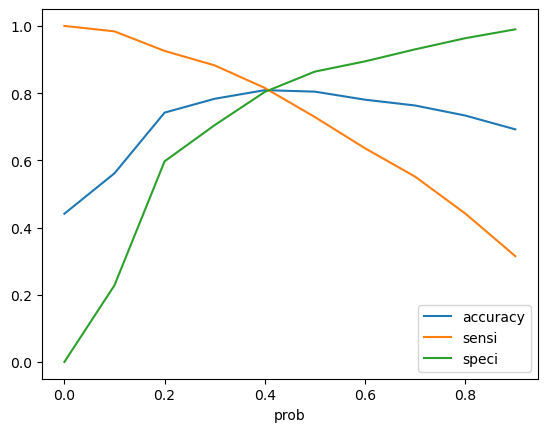

In [200]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [201]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.34 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.970713,3188,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.179271,8278,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.711375,8129,1,1,1,1,1,1,1,1,1,0,0,1
3,1,0.669328,2393,1,1,1,1,1,1,1,1,0,0,0,1
4,0,0.180757,1016,0,1,1,0,0,0,0,0,0,0,0,0


In [202]:
##Assigning Lead Score to the Training data

In [203]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.970713,3188,1,1,1,1,1,1,1,1,1,1,1,1,97
1,0,0.179271,8278,0,1,1,0,0,0,0,0,0,0,0,0,18
2,0,0.711375,8129,1,1,1,1,1,1,1,1,1,0,0,1,71
3,1,0.669328,2393,1,1,1,1,1,1,1,1,0,0,0,1,67
4,0,0.180757,1016,0,1,1,0,0,0,0,0,0,0,0,0,18


In [204]:
###Model Evaluation

In [205]:

# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy : 0.795017266896892


In [206]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1688,  578],
       [ 253, 1535]], dtype=int64)

In [207]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [208]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))


Sensitivity :  0.8585011185682326


In [209]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.7449249779346867


In [210]:
# Calculate false postive rate - predicting converted lead when the lead was actually not have converted
print("False Positive rate : ",FP/ float(TN+FP))

False Positive rate :  0.25507502206531335


In [211]:
# Positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7264552768575485


In [212]:
# Negative predictive value
print("Negative Predictive Value : ",TN / float(TN+ FN))

Negative Predictive Value :  0.8696548171045853


In [213]:
### Precision and Recall

In [214]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[1958,  308],
       [ 485, 1303]], dtype=int64)

In [215]:
# Precision
TP / TP + FP

print("Precision : ",confusion[1,1]/(confusion[0,1]+confusion[1,1]))

Precision :  0.8088144009931719


In [216]:
# Recall
TP / TP + FN

print("Recall :",confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Recall : 0.7287472035794184


In [217]:
from sklearn.metrics import precision_score, recall_score


In [218]:
print("Precision :",precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted))


Precision : 0.8088144009931719


In [219]:
print("Recall :",recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted))


Recall : 0.7287472035794184


In [220]:
### Precision and recall tradeoff

In [221]:
from sklearn.metrics import precision_recall_curve

y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       0
        ..
 4049    1
 4050    1
 4051    0
 4052    0
 4053    1
 Name: Converted, Length: 4054, dtype: int64,
 0       1
 1       0
 2       1
 3       1
 4       0
        ..
 4049    1
 4050    1
 4051    0
 4052    0
 4053    0
 Name: predicted, Length: 4054, dtype: int64)

In [222]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)


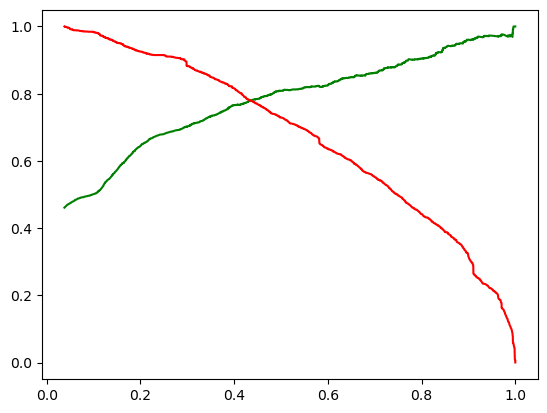

In [223]:
# plotting a trade-off curve between precision and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()


In [224]:
## Making predictions on the test set

In [225]:
###Scaling the test data

In [226]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                                                        'Total Time Spent on Website',
                                                                                                        'Page Views Per Visit']])

In [227]:
# Assigning the columns selected by the final model to the X_test 
X_test = X_test[col1]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Other_Activity,Last Activity_SMS Sent,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified
7614,1,0.022429,1,0,0,0,0,0,0,1,0,0,0,0
7388,0,-0.741640,1,0,0,0,0,0,0,1,0,0,0,0
7657,0,-0.961241,1,0,0,0,0,1,0,0,0,0,1,0
965,0,-0.385921,1,0,0,0,0,0,0,1,0,0,0,1
6875,0,0.967987,1,0,0,0,0,0,0,0,0,0,0,1


In [228]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

7614    0.228740
7388    0.362439
7657    0.121397
965     0.198328
6875    0.253410
3184    0.198823
8969    0.252389
8061    0.539202
2949    0.055741
8980    0.997822
dtype: float64

In [229]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [230]:
# Let's see the head
y_pred_1.head()

,0
7614,0.228740
7388,0.362439
7657,0.121397
965,0.198328
6875,0.253410


In [231]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [232]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [233]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [234]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [235]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,7614,0.228740
1,0,7388,0.362439
2,0,7657,0.121397
3,0,965,0.198328
4,0,6875,0.253410


In [236]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [237]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])

In [238]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,7614,0,0.228740
1,7388,0,0.362439
2,7657,0,0.121397
3,965,0,0.198328
4,6875,0,0.253410


In [239]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.34 else 0)


In [240]:
y_pred_final.head()


,Prospect ID,Converted,Converted_prob,final_predicted
0,7614,0,0.228740,0
1,7388,0,0.362439,1
2,7657,0,0.121397,0
3,965,0,0.198328,0
4,6875,0,0.253410,0


In [241]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy : 0.7825086306098964


In [242]:
# Making the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[742, 250],
       [128, 618]], dtype=int64)

In [243]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [244]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.8284182305630027


In [245]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.7479838709677419


In [246]:
###Assigning Lead Score to the Testing data

In [247]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,7614,0,0.228740,0,23
1,7388,0,0.362439,1,36
2,7657,0,0.121397,0,12
3,965,0,0.198328,0,20
4,6875,0,0.253410,0,25


In [248]:
##Observations:

In [249]:
#After running the model on the Test Data , we obtain:

#Accuracy : 80.4 %
#Sensitivity : 80.4 %
#Specificity : 80.5 %



In [250]:
##Results 

#1) Comparing the values obtained for Train & Test:
#Train Data:
#Accuracy : 81.0 %
#Sensitivity : 81.7 %
#Specificity : 80.6 %

#Test Data:
#Accuracy : 80.4 %
#Sensitivity : 80.4 %
#Specificity : 80.5 %


In [251]:
##2) Finding out the leads which should be contacted:

In [252]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
hot_leads

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
9,8980,1,0.997822,1,100
13,5769,1,0.868555,1,87
16,1439,1,0.947166,1,95
18,2630,1,0.910293,1,91
19,5799,1,0.970713,1,97
...,...,...,...,...,...
1722,1565,1,0.908464,1,91
1730,2709,1,0.853504,1,85
1731,6375,1,0.994852,1,99
1734,4157,1,0.932686,1,93


In [253]:
print("The Prospect ID of the customers which should be contacted are :")

hot_leads_ids = hot_leads["Prospect ID"].values.reshape(-1)
hot_leads_ids

The Prospect ID of the customers which should be contacted are :


array([8980, 5769, 1439, 2630, 5799, 1710, 4979, 4048, 8115, 2095, 4941,
       6987, 4782, 3893, 1203, 4438, 8888, 2762, 8596, 7683, 7082, 5376,
       7905, 8242, 6687, 8366, 8393, 7297, 4198, 2126, 2852, 8977, 1263,
       7412, 1254, 3078, 5687, 2411, 7128, 2994,  889, 8138, 6156, 4957,
       3725, 3123, 6457, 1899, 3491, 2578, 2672, 8343, 3721, 4771, 5579,
       9031,  784, 5907, 2140, 7496, 4610, 1234, 3519, 7136, 8597, 2727,
       7508, 7113, 2524, 5049, 8415, 8362, 5783,  556, 3325, 8265, 2770,
       8293, 1747, 5784, 8475, 5292,  899, 7053, 7756, 8220, 4909, 3521,
       2962, 7963, 5659, 7931,  448, 8073, 8112, 5806, 1559, 3716, 8027,
       5697, 8521, 5541, 4375, 8282,  475, 5661, 4200,  810, 8568, 5159,
       7042, 1823, 2878, 8065, 4543, 5162, 2067,  242, 8090, 7191, 8990,
       8790, 2687, 2677, 8591, 2266, 7817, 5571, 4865, 3210, 8286, 8106,
       8080, 3971, 1468,  807, 6010, 1190,  619, 9235, 1780, 2575, 7814,
       7105, 3074, 5790, 5575, 2158, 2744, 2489, 70

In [254]:
##3) Finding out the Important Features from our final model:

In [255]:
res.params.sort_values(ascending=False)


Lead Source_Welingak Website                            22.823776
Lead Source_Reference                                    3.172396
What is your current occupation_Working Professional     2.927003
Last Activity_Other_Activity                             2.211828
Lead Source_Referral Sites                               1.989171
Last Activity_Email Link Clicked                         1.148615
Last Activity_SMS Sent                                   1.106720
Total Time Spent on Website                              1.051025
Last Activity_Email Opened                               0.995558
const                                                    0.367485
Last Notable Activity_Email Opened                      -1.072504
Last Notable Activity_Modified                          -1.205853
Lead Origin_Landing Page Submission                     -1.259515
Last Notable Activity_Email Link Clicked                -1.408292
Do Not Email                                            -1.453703
dtype: flo